In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,LabelEncoder,PowerTransformer
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
import pickle
from scipy.stats import zscore
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest
import warnings
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import precision_score
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
data = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [3]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


QUICK PREVIEW OF DATA

In [4]:
data.shape

(1470, 35)

Our datset has 34 feature's , 1 label and 1470 row's of data

# DATA PRE PROCESSING

In [5]:
data.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

No Null Values present in the dataset

In [6]:
data.drop_duplicates(inplace=True)

In [7]:
data.shape

(1470, 35)

No duplicate Values Present in the Data set

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


In [10]:
data.drop(['EmployeeCount','StandardHours'],axis=1,inplace=True)

EmployeeCount and StandardHours have 0 variance so we can drop that column

In [11]:
data.shape

(1470, 33)

In [12]:
data['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

Data set is not balanced

Dividing Data into Categorical and Continous Values

In [13]:
cat_data = data.select_dtypes('object').columns.tolist()

In [14]:
cont_data = data.select_dtypes('int64').columns.tolist()

In [15]:
cat_data

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'Over18',
 'OverTime']

In [16]:
cat_data = cat_data[1:]

In [17]:
cont_data

['Age',
 'DailyRate',
 'DistanceFromHome',
 'Education',
 'EmployeeNumber',
 'EnvironmentSatisfaction',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [18]:
for i in data[cat_data]:
    print(f"{data[cat_data][i].nunique()}\n{data[cat_data][i].value_counts()}\n")

3
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

3
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

6
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

2
Male      882
Female    588
Name: Gender, dtype: int64

9
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64

3
Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64

1
Y    1470
Name: Over18, dtype: int64

2
No     1054
Yes     416
Name: OverTime, dtype: int64



# EDA

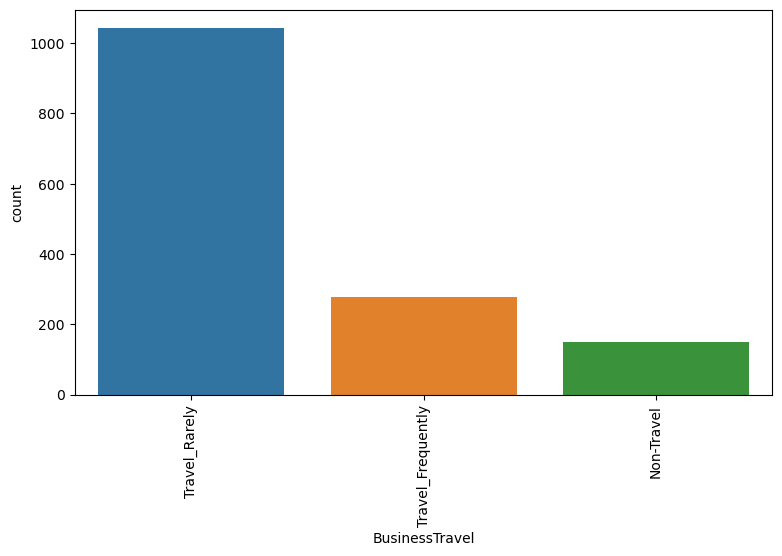

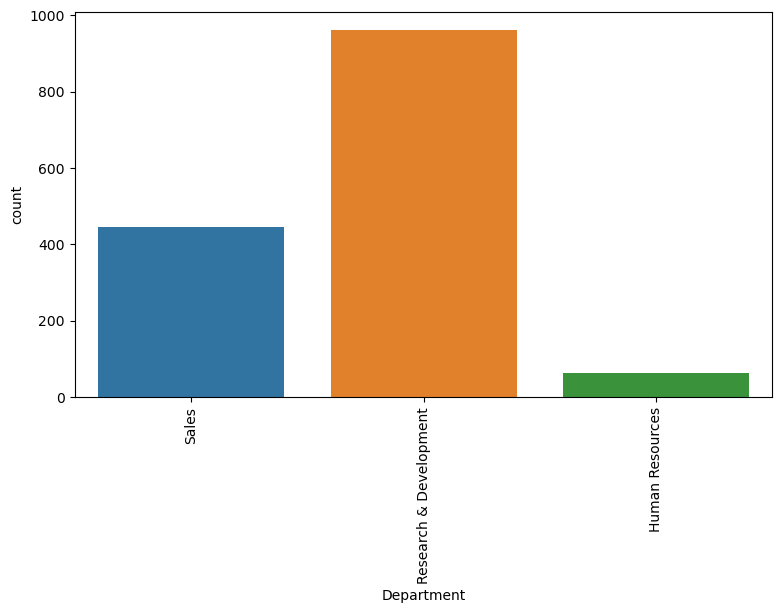

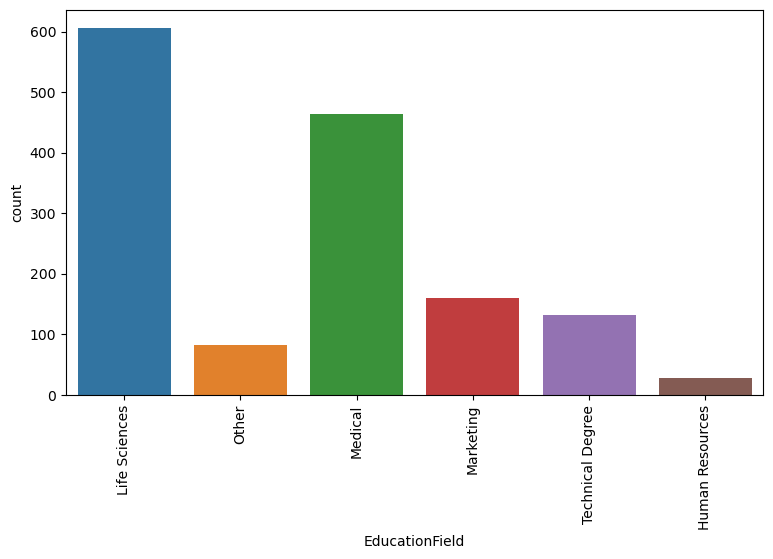

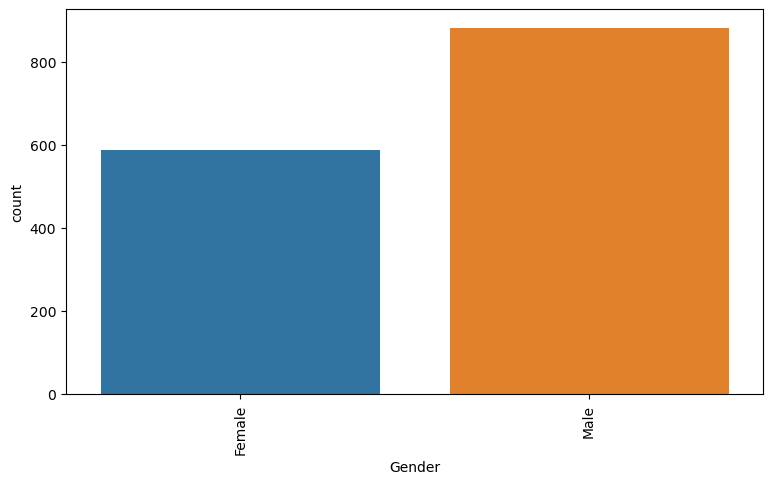

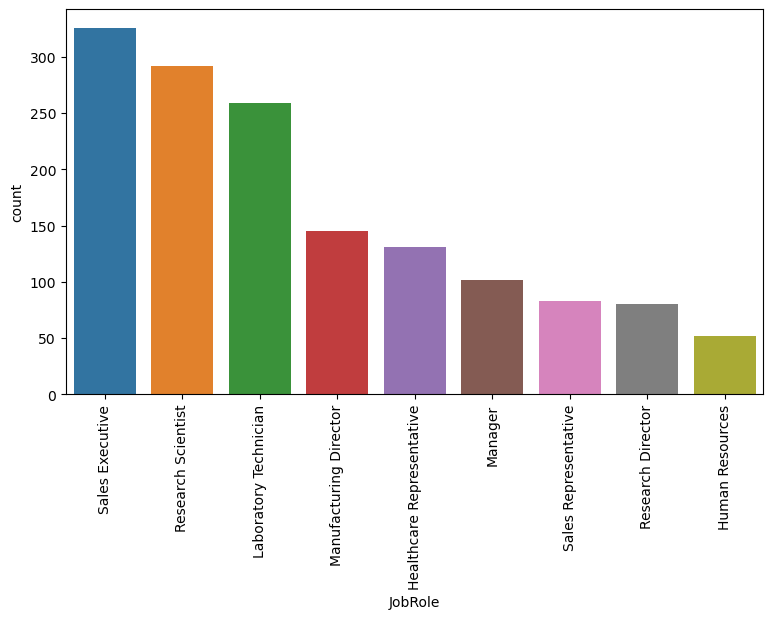

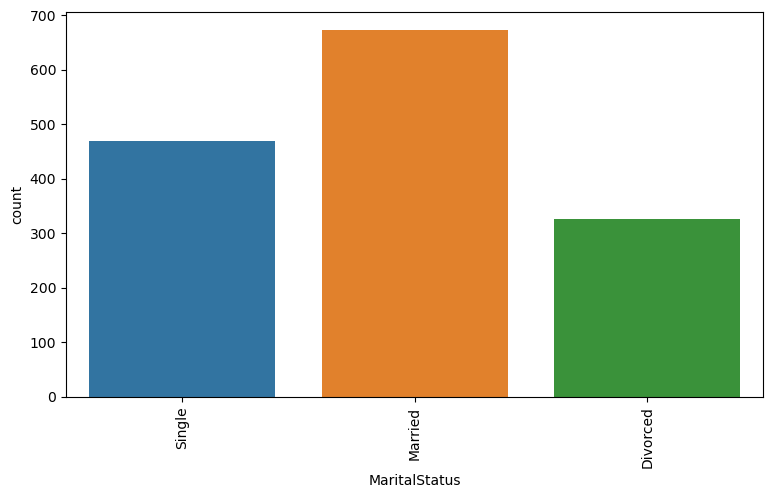

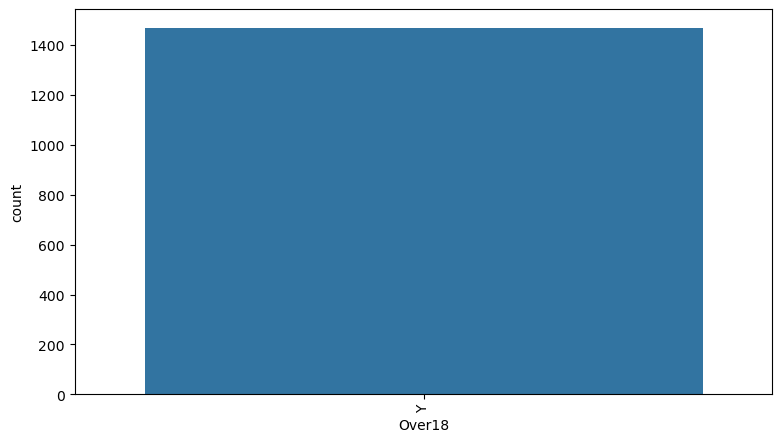

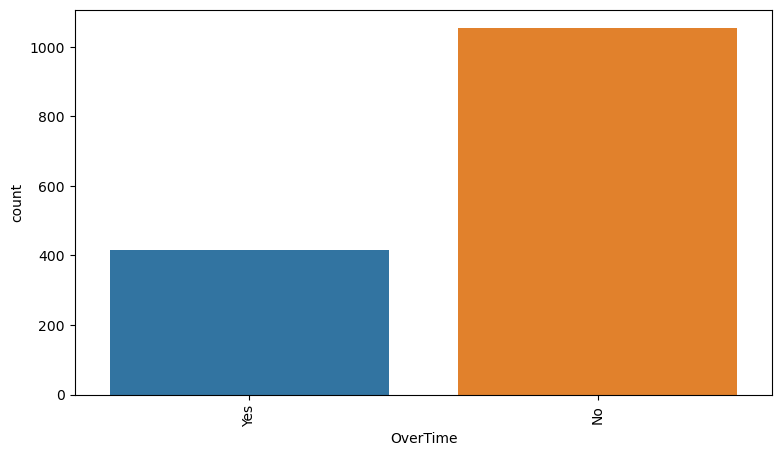

In [19]:
for i in data[cat_data]:
    plt.figure(figsize=(9,5))
    sns.countplot(x=data[cat_data][i])
    plt.xlabel(i)
    plt.xticks(rotation=90)
    plt.show()

from above charts we get following information:
    
1. Most of the people working in the office travel Rarely

2. most of the meployees work in R&D department

3. most have graduate degree in Life Sciences

4. male are more educated compared to female

5. most desigantion in office is sales executive

6. most of the office staff is married

7. everyone is over 18

8. most employees dont prefeer to do overtime

In [20]:
data.drop('Over18',axis=1,inplace=True)

since Over18 column has 0 variance we can drop it

In [21]:
cat_data.remove('Over18')

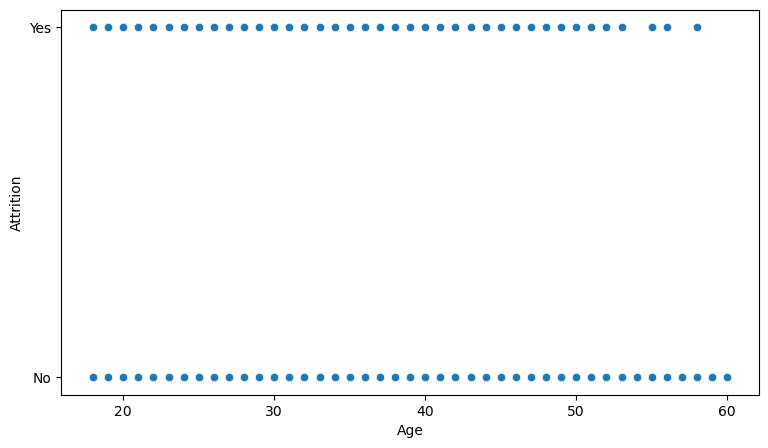

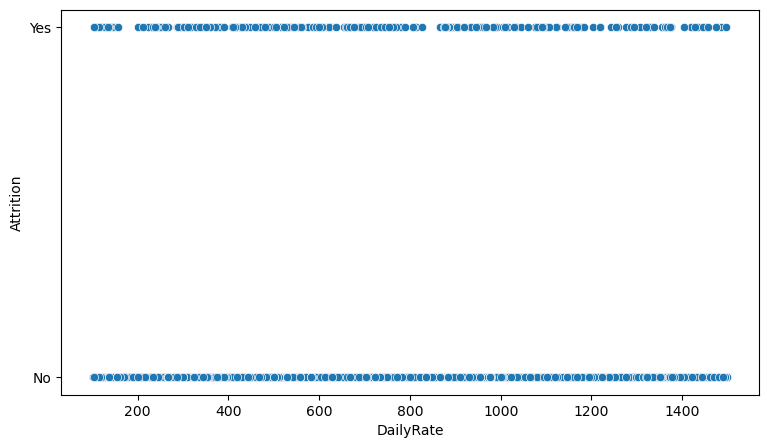

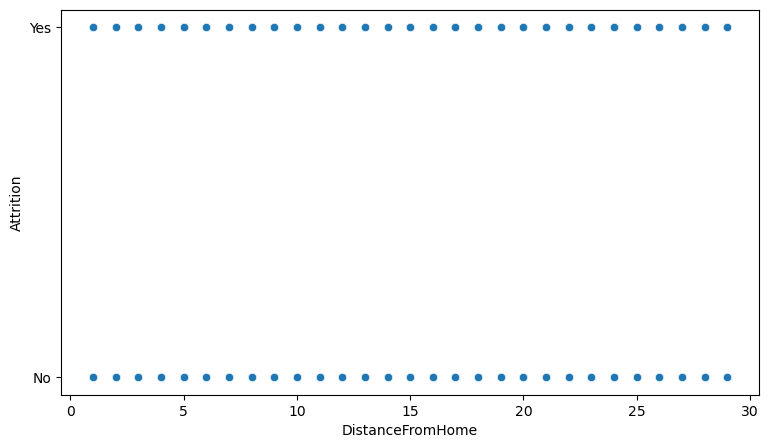

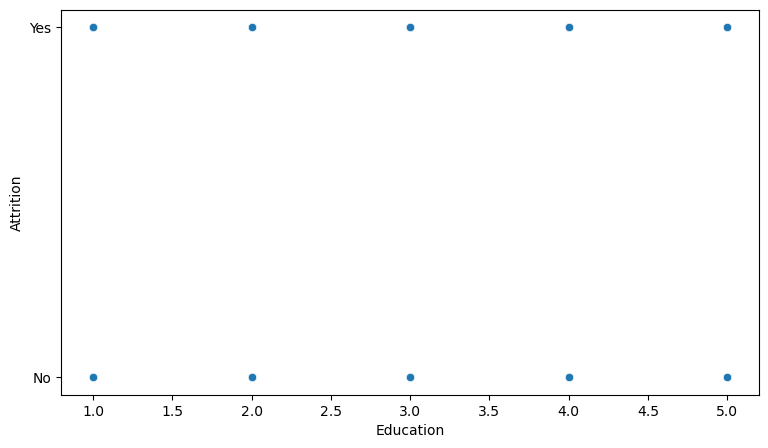

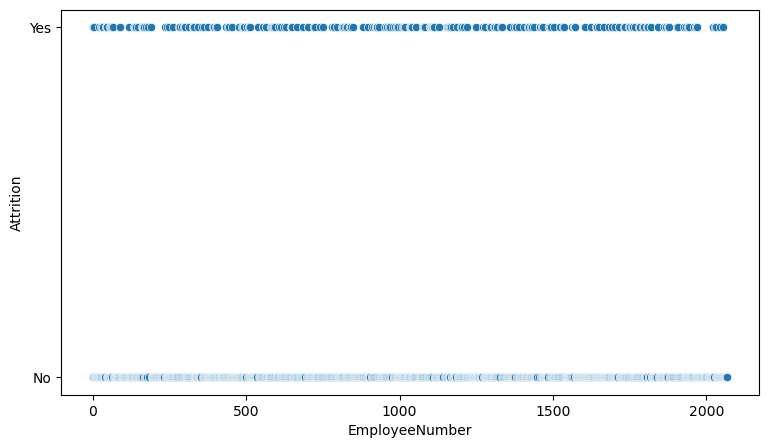

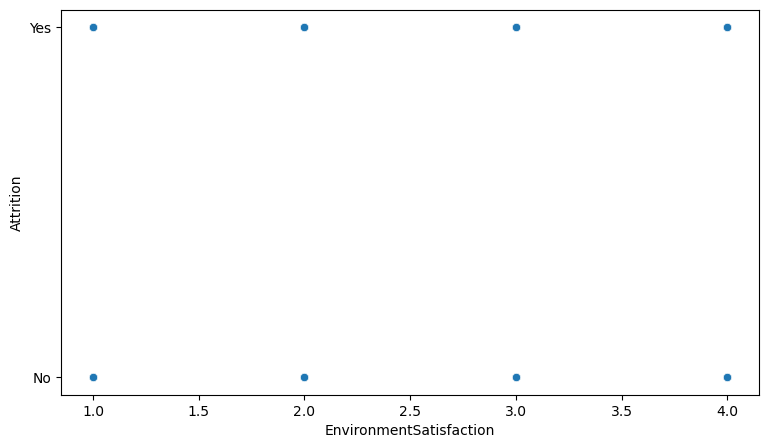

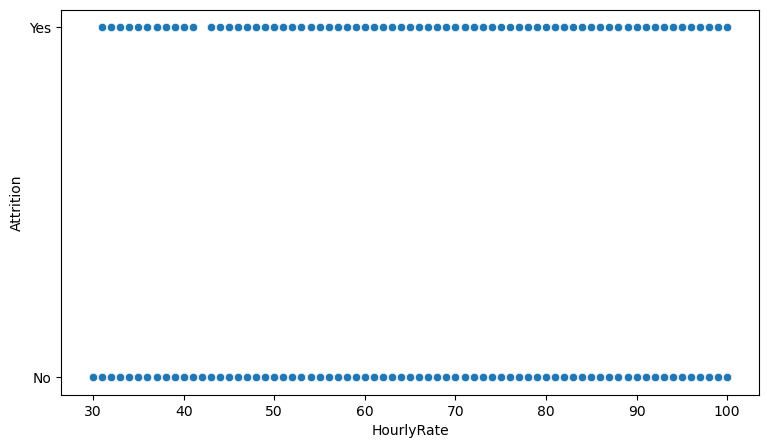

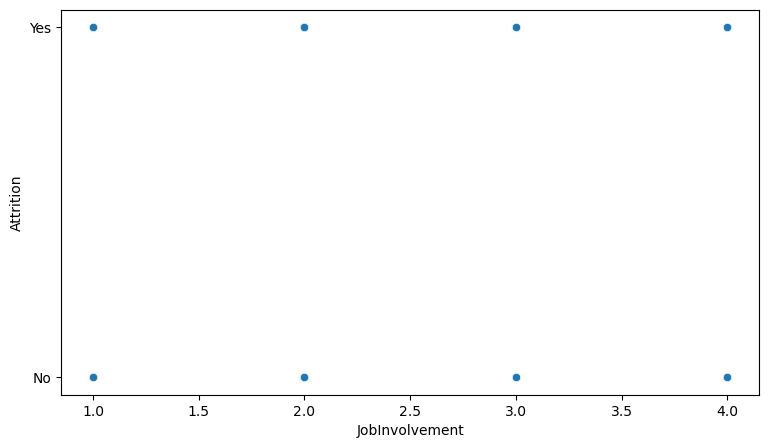

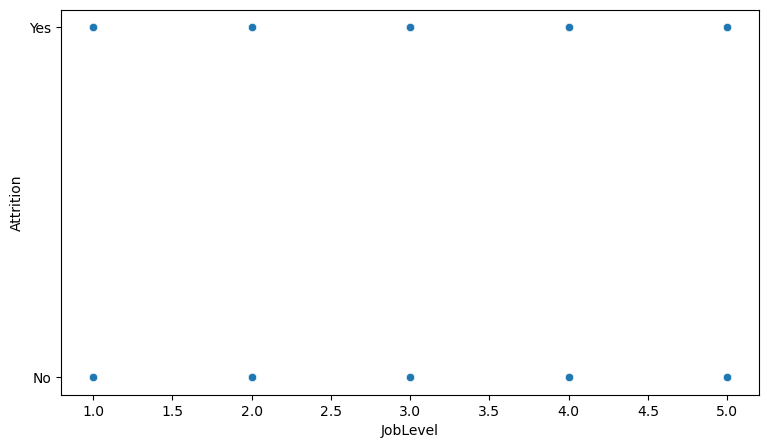

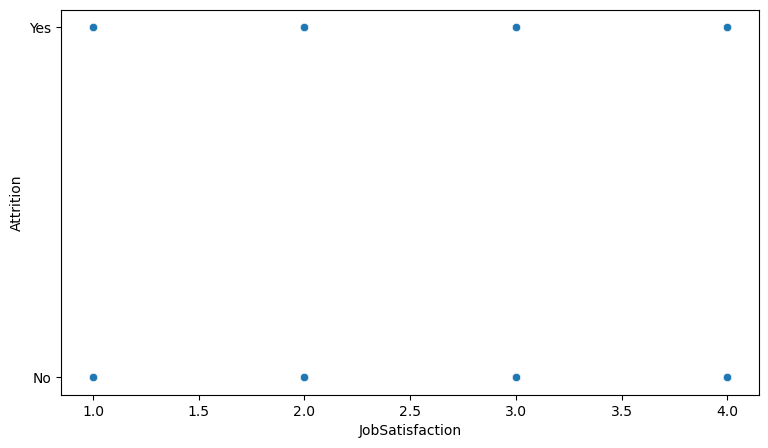

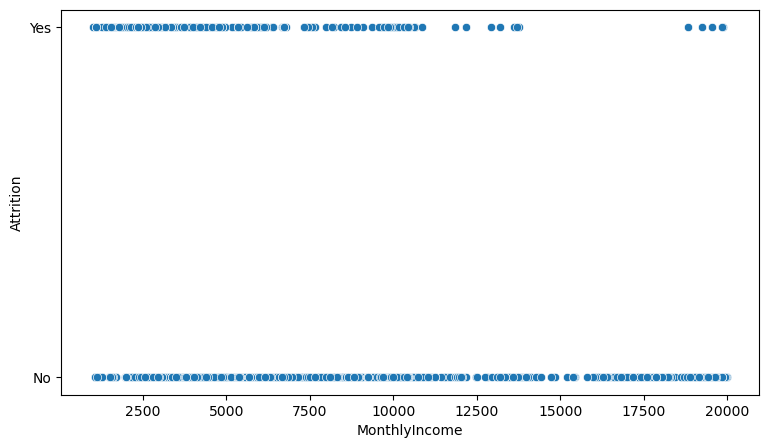

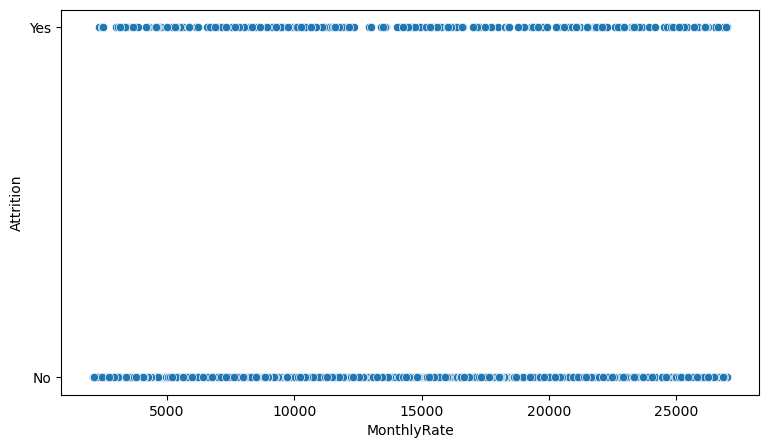

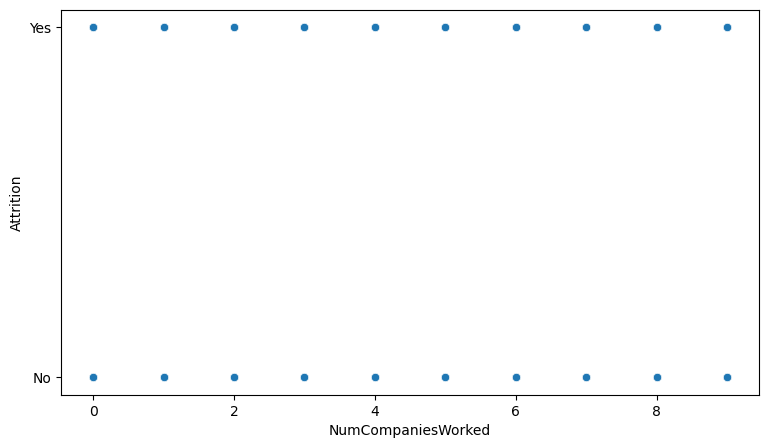

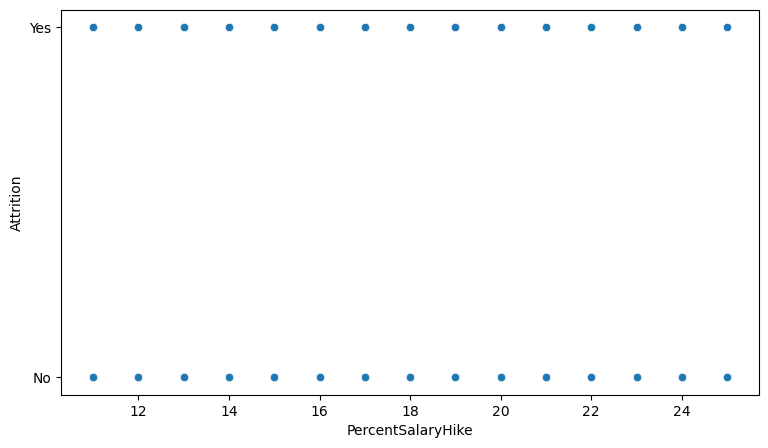

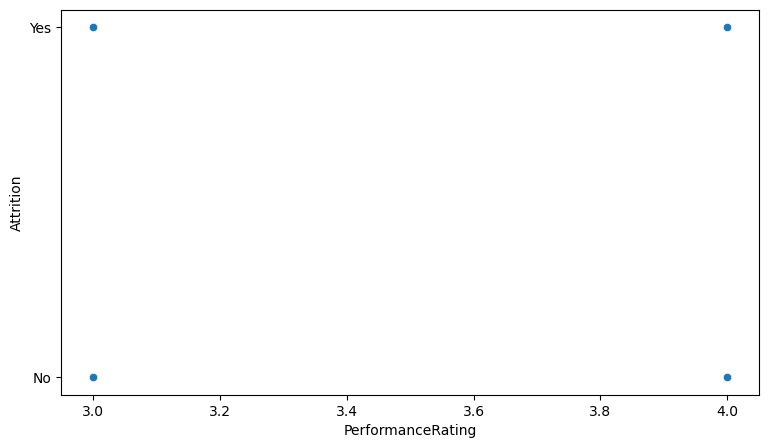

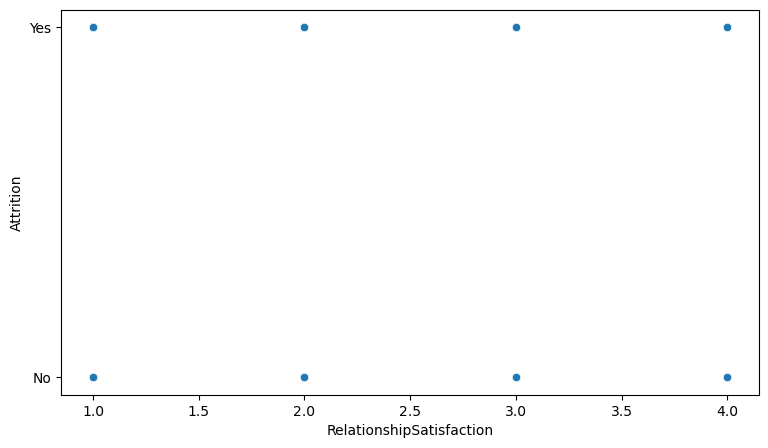

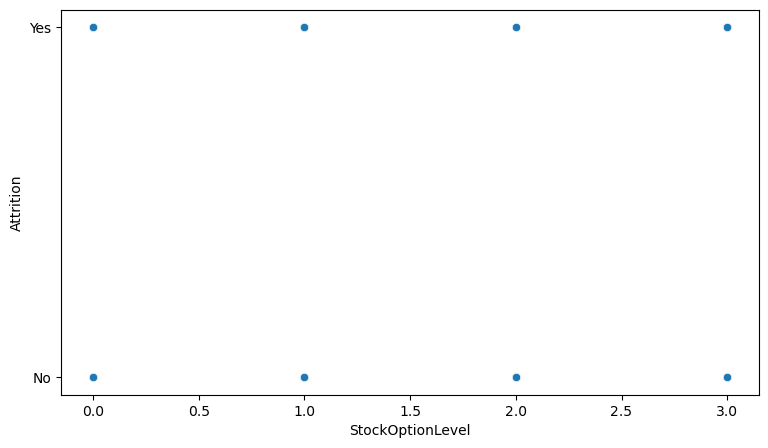

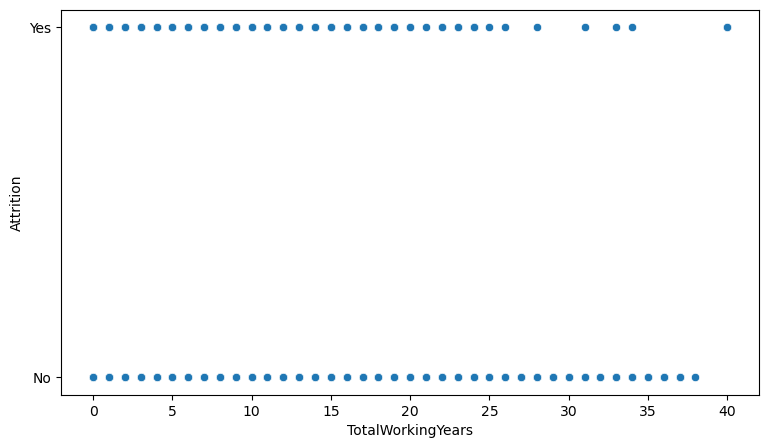

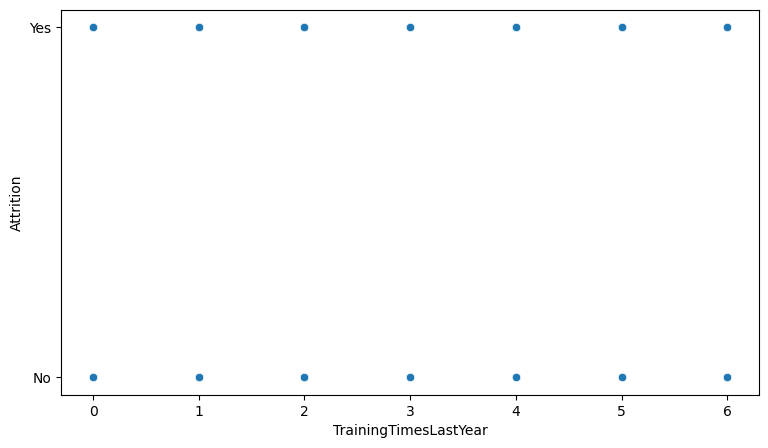

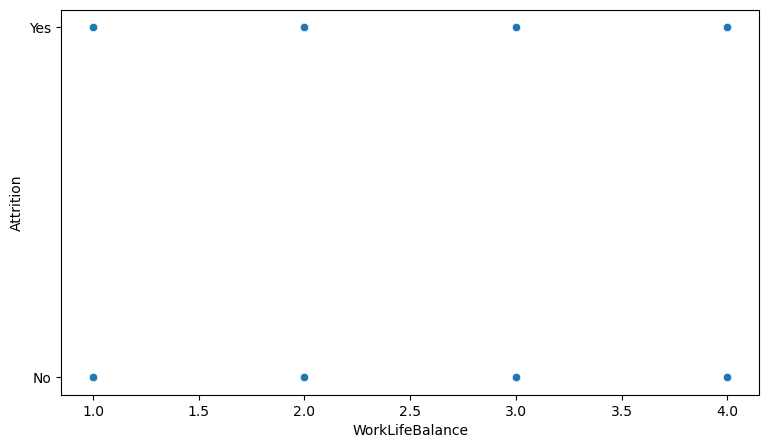

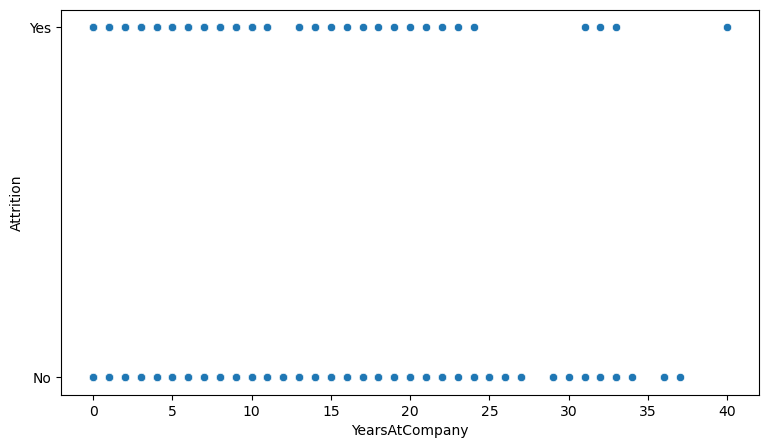

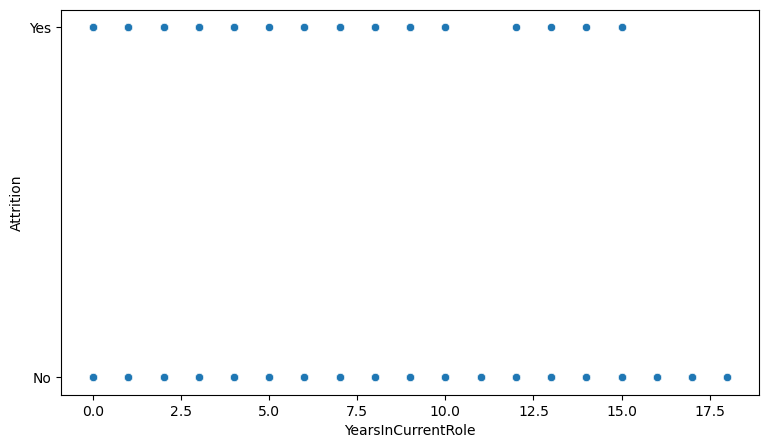

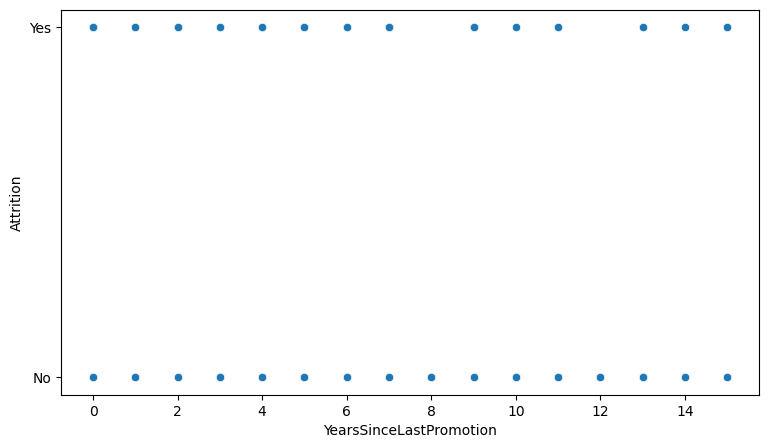

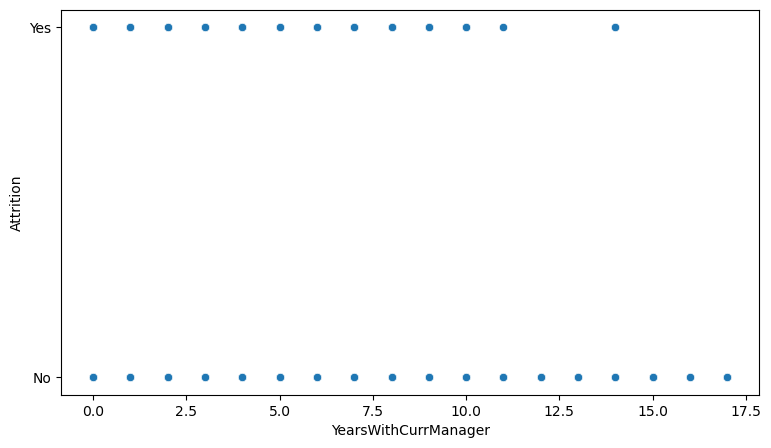

In [22]:
for i in data[cont_data]:
    plt.figure(figsize=(9,5))
    sns.scatterplot(x=data[cont_data][i],y = data['Attrition'])
    plt.xlabel(i)
    plt.show()

In [23]:
len(cont_data)

24

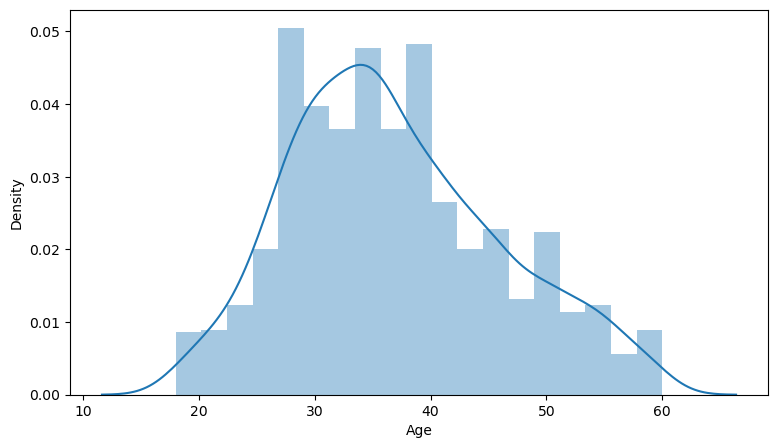

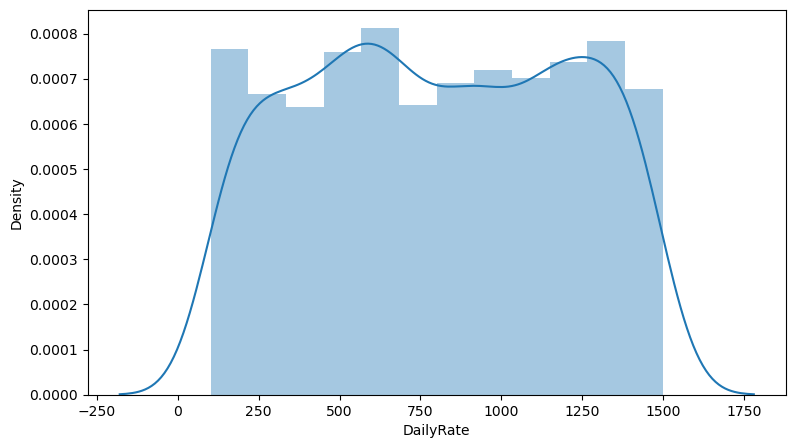

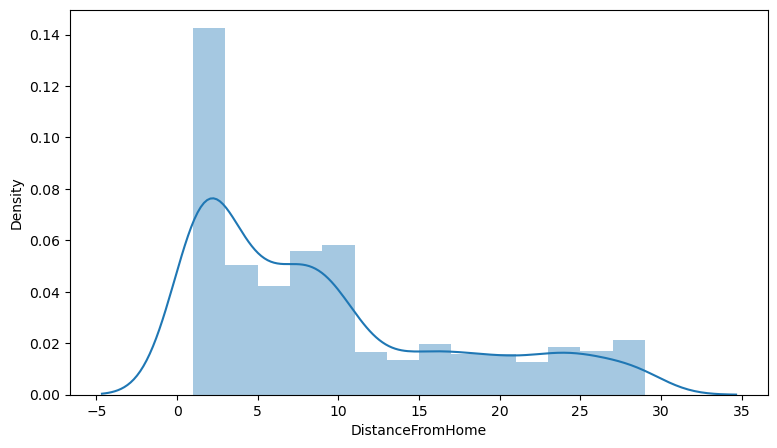

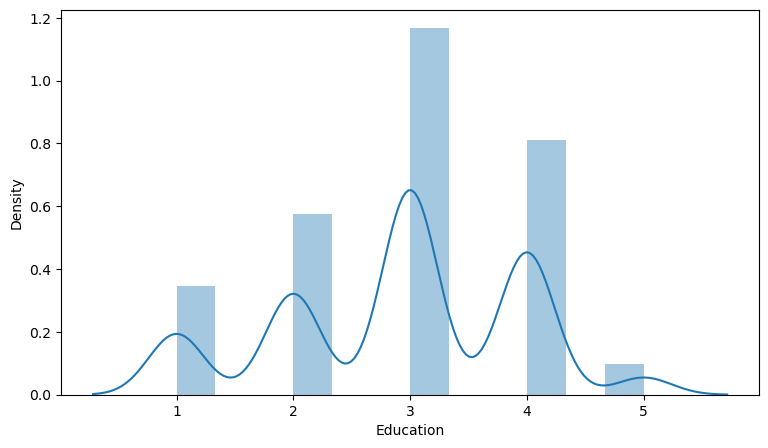

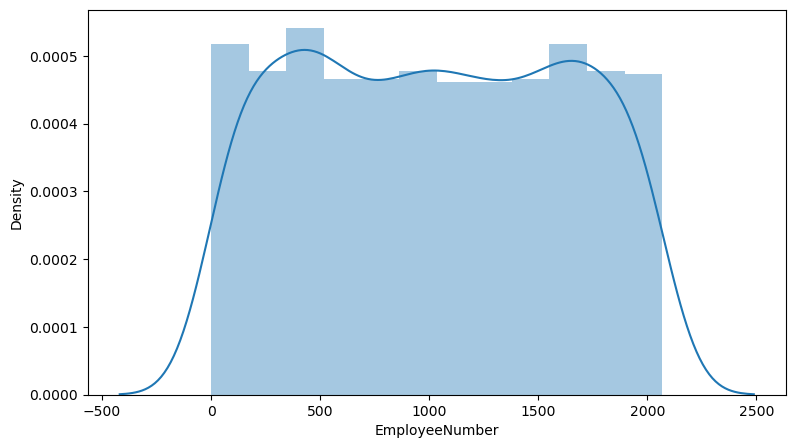

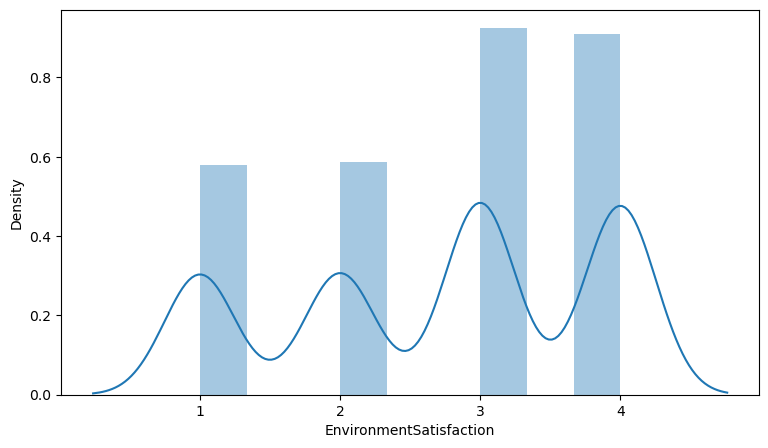

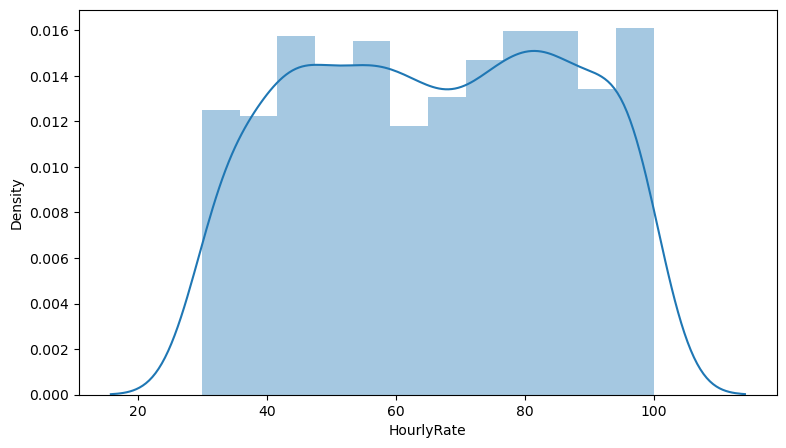

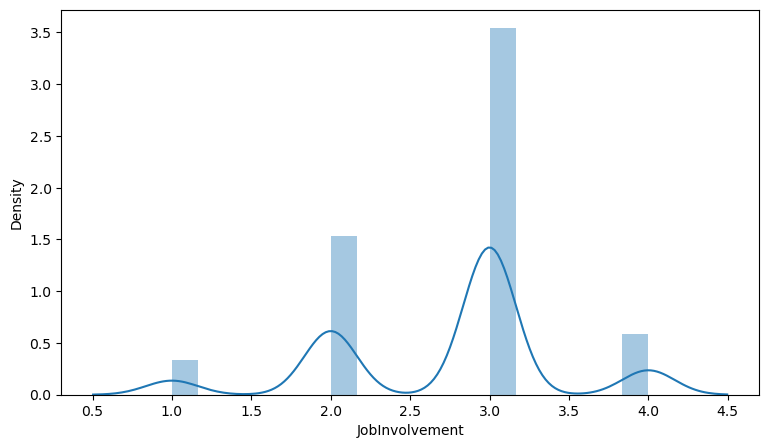

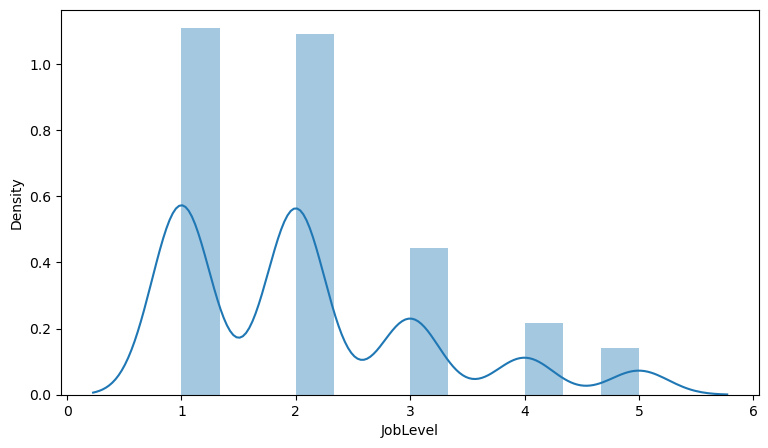

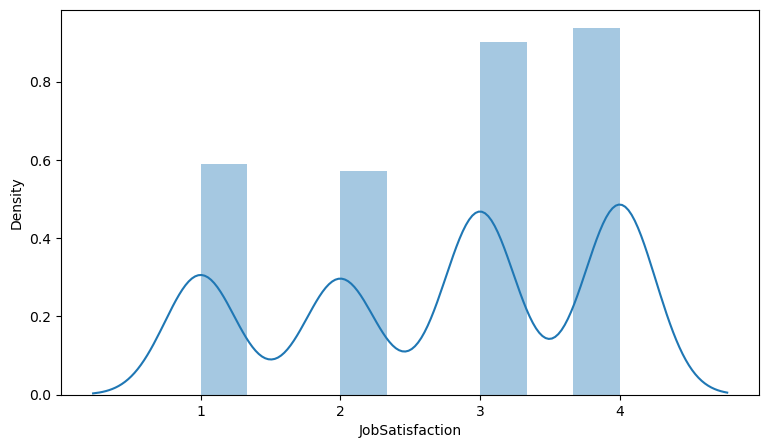

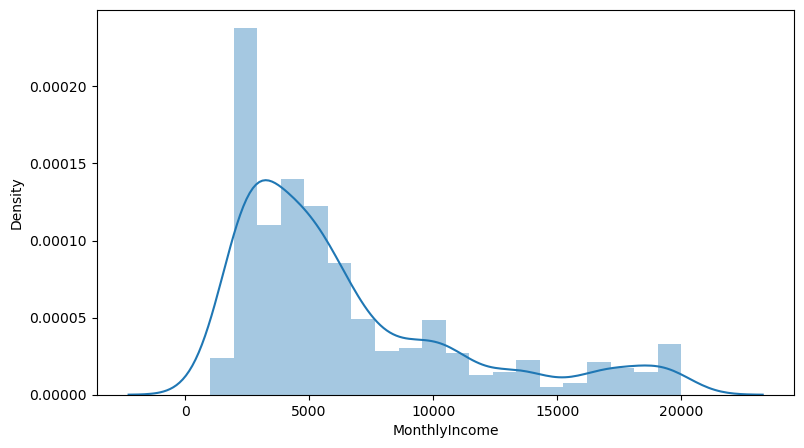

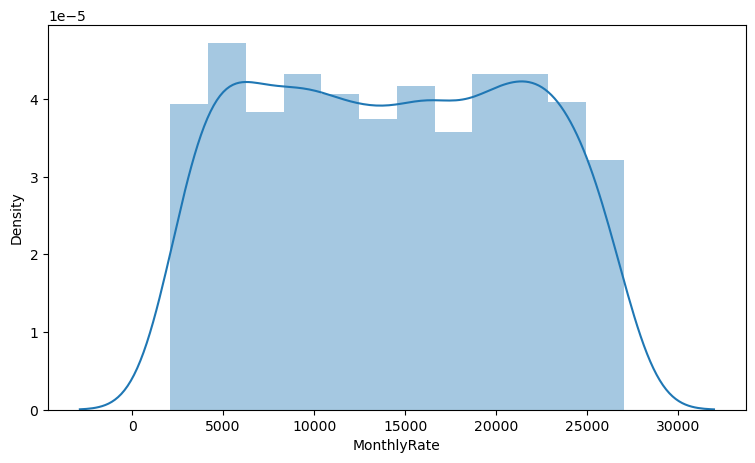

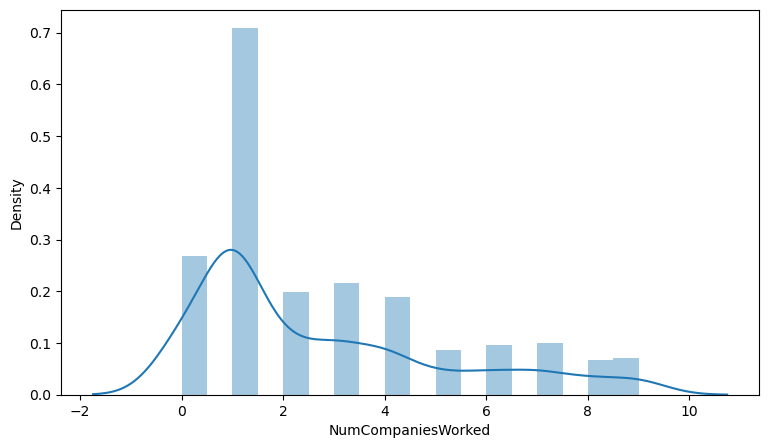

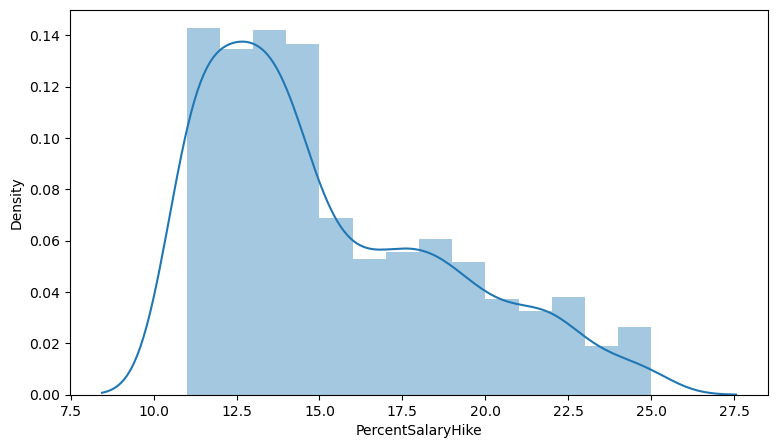

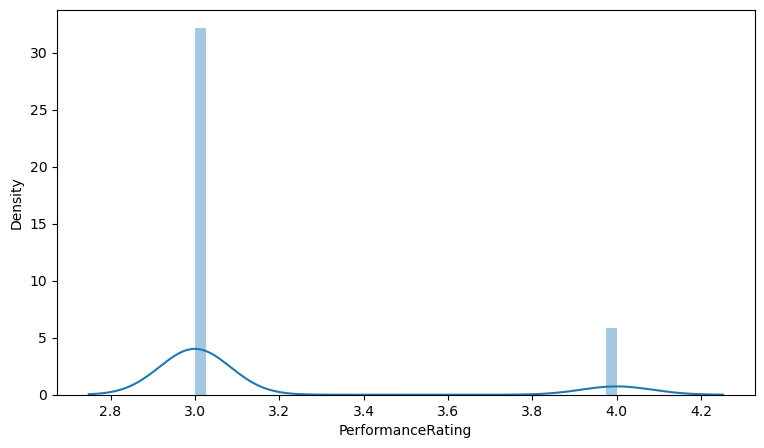

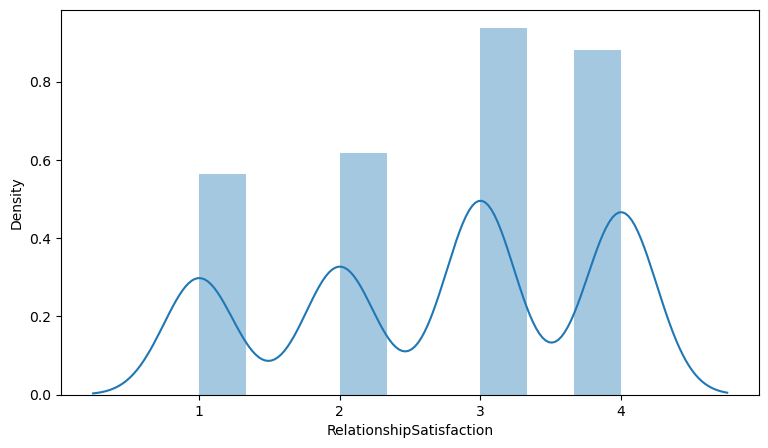

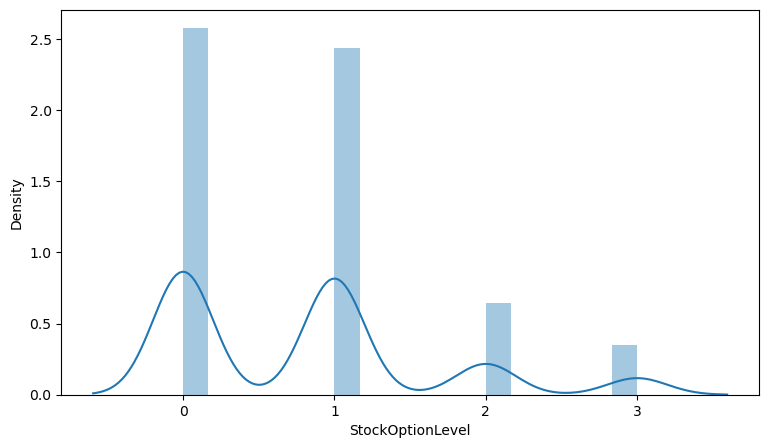

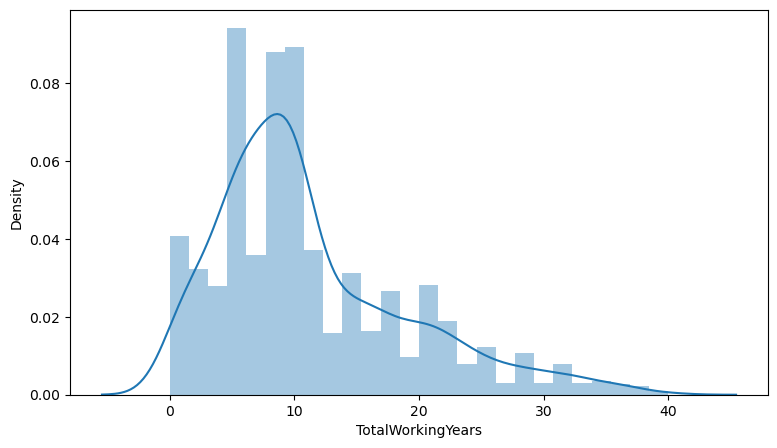

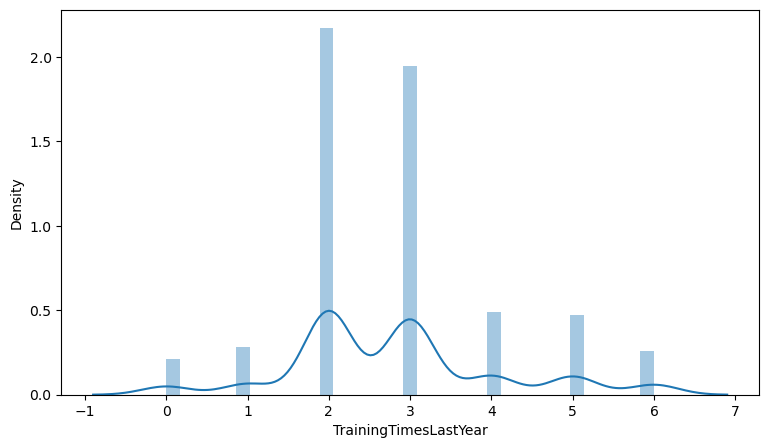

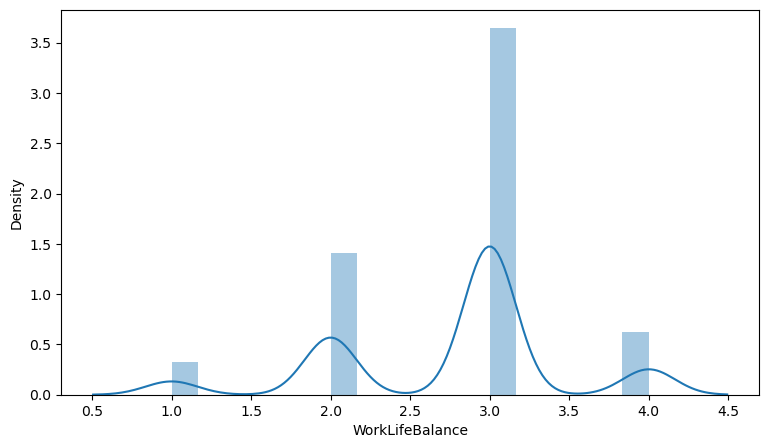

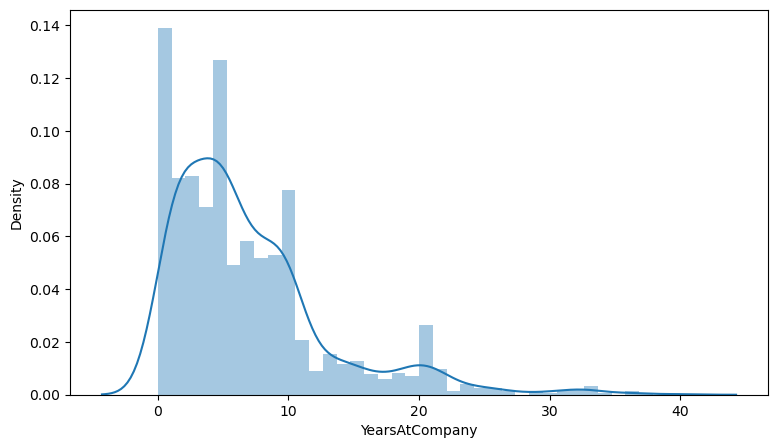

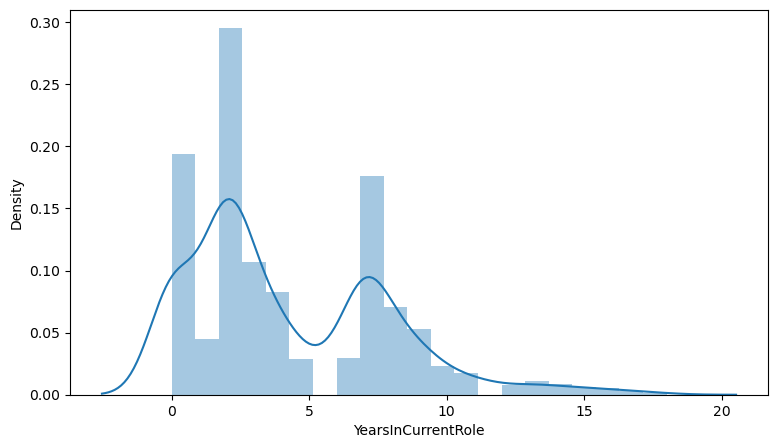

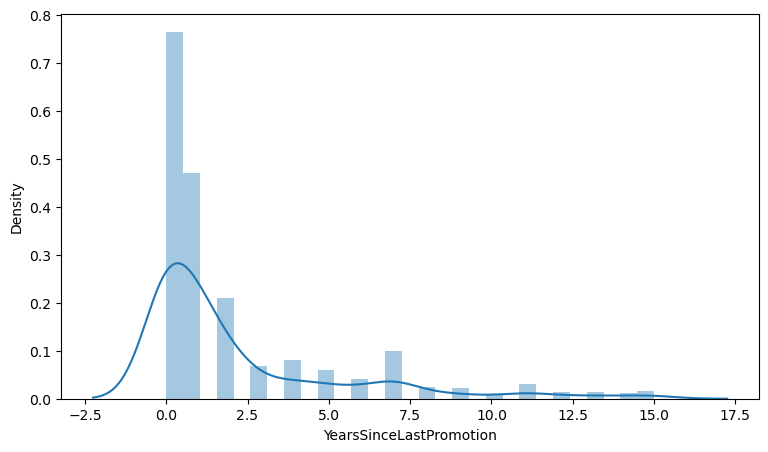

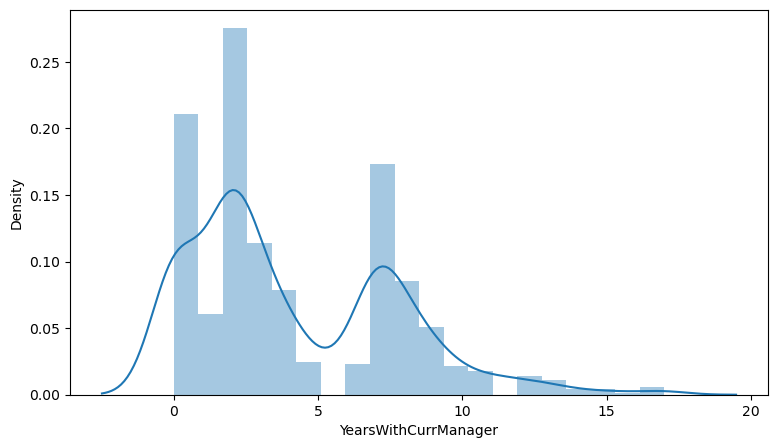

In [24]:
for i in data[cont_data]:
    plt.figure(figsize=(9,5))
    sns.distplot(data[cont_data][i])
    plt.xlabel(i)
    plt.show()
        

Education,EnviormentSatisfaction,JobInvolvement,JovLevel,JobSatisfaction,NumCompaniesWorked,PerformanceRating,RelationshipSatisfaction
StockOptionLevel,trainingTimesLastYear,WorkLifeBalance,Years inCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager are discrete Values

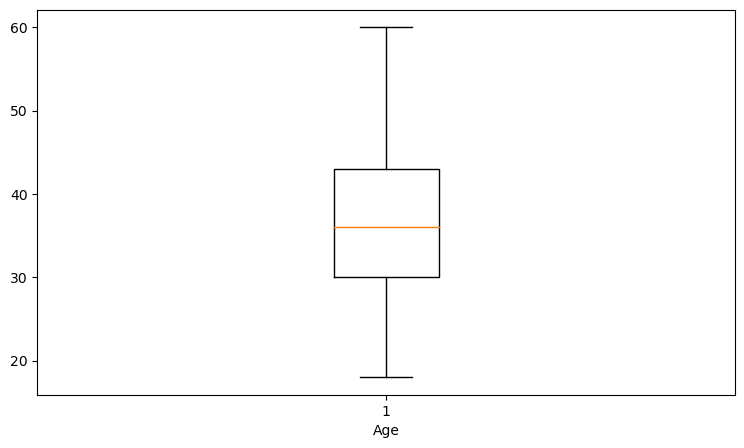

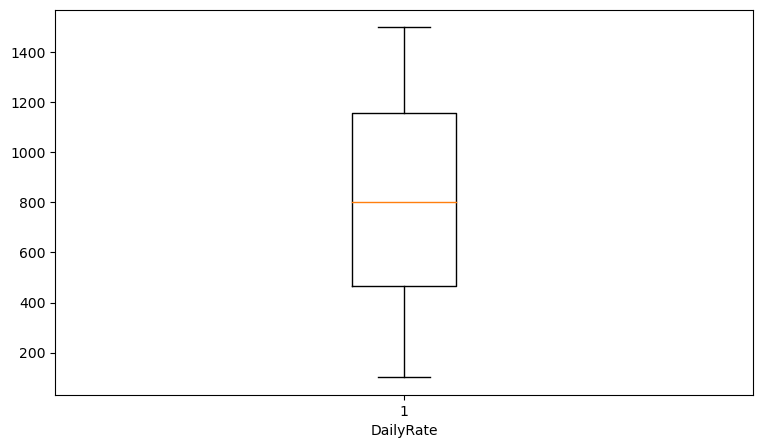

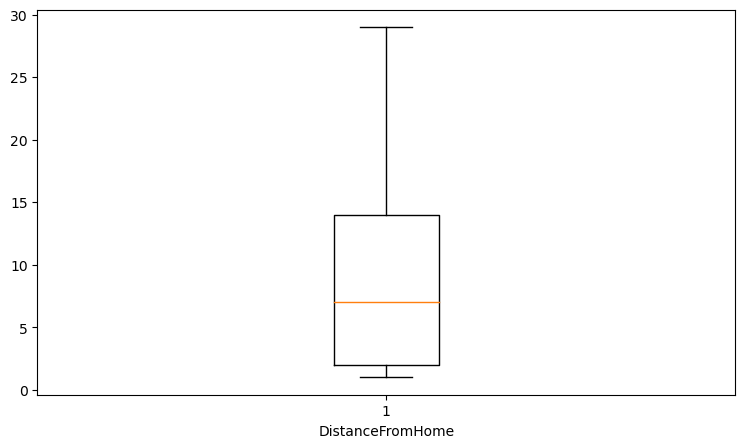

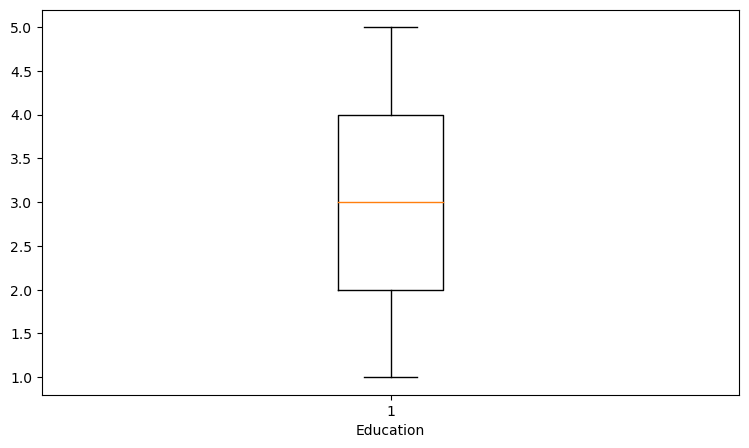

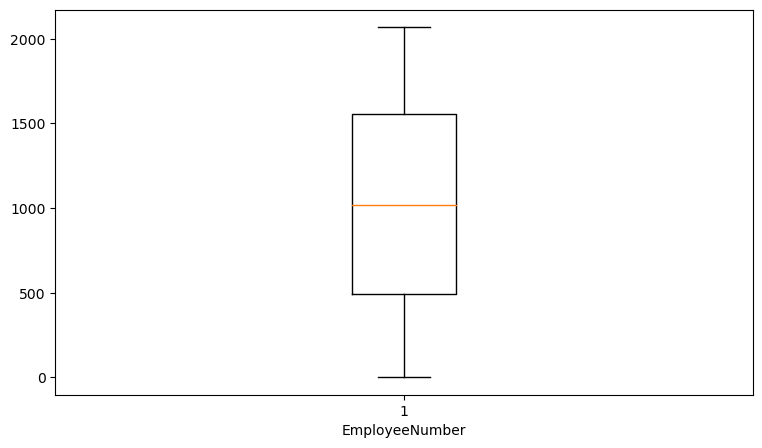

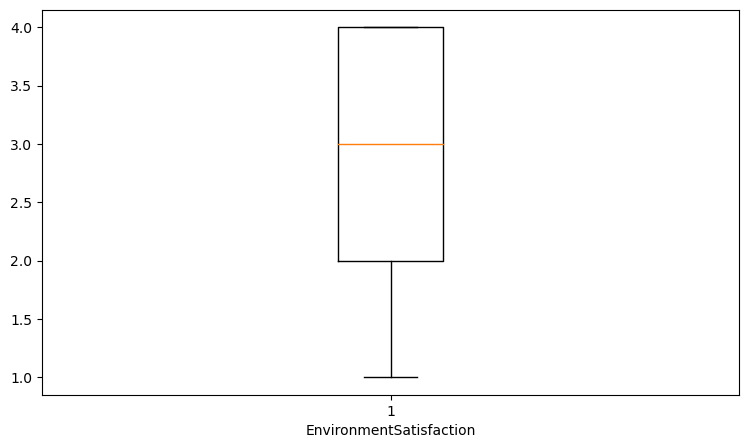

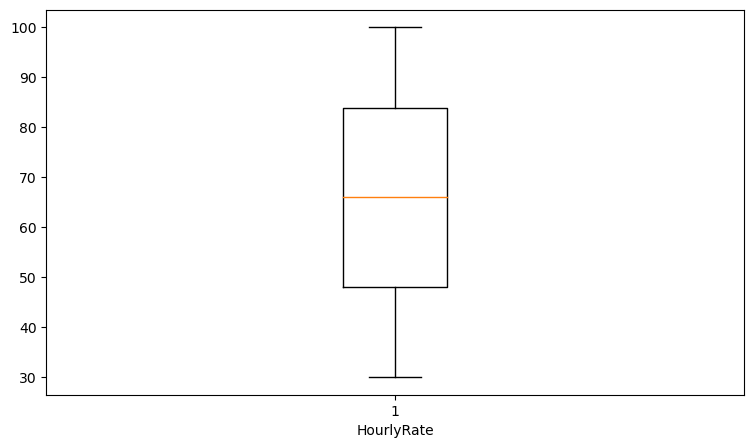

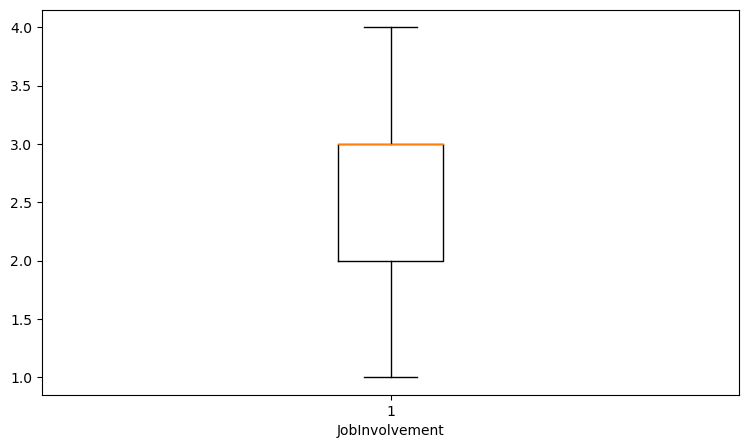

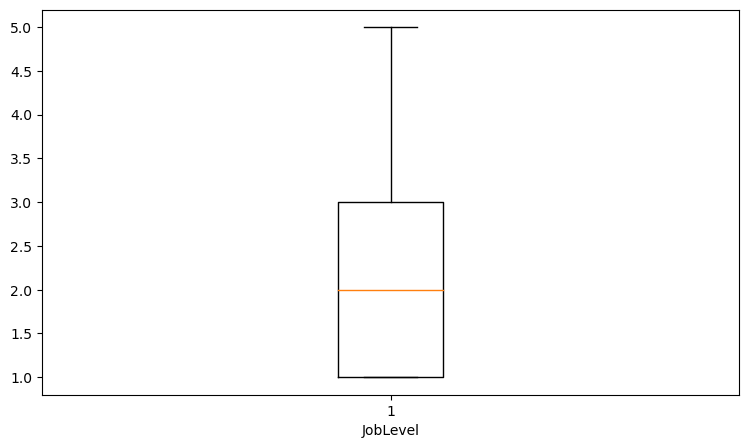

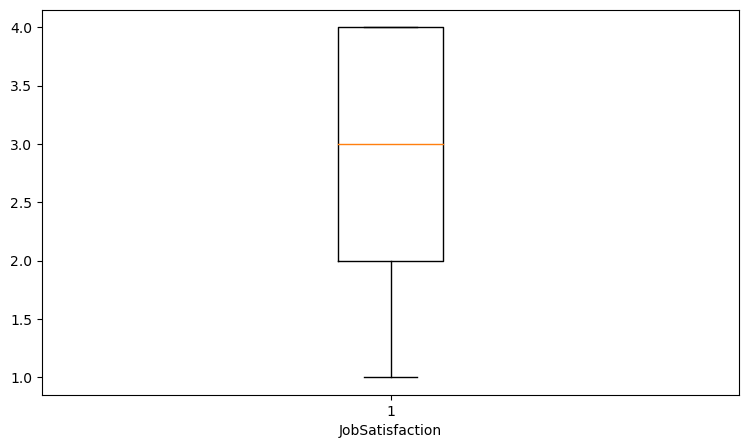

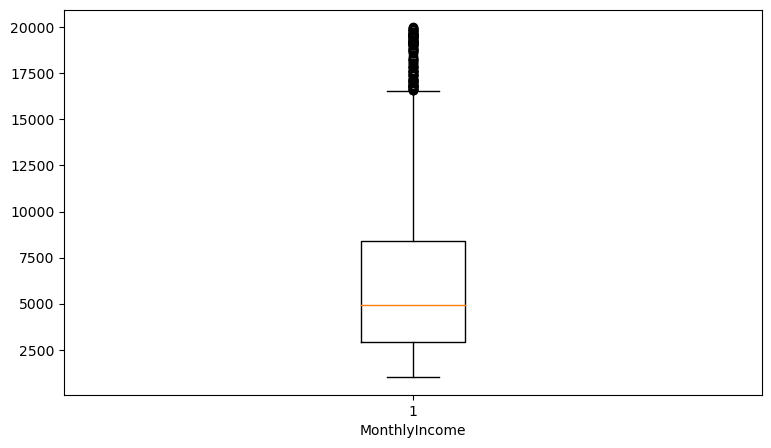

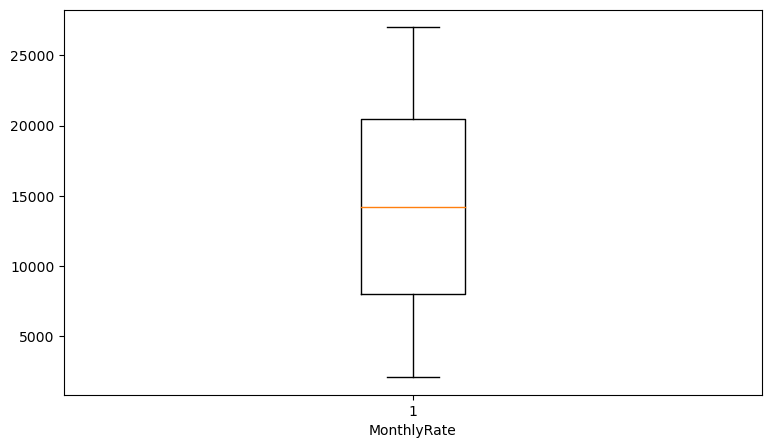

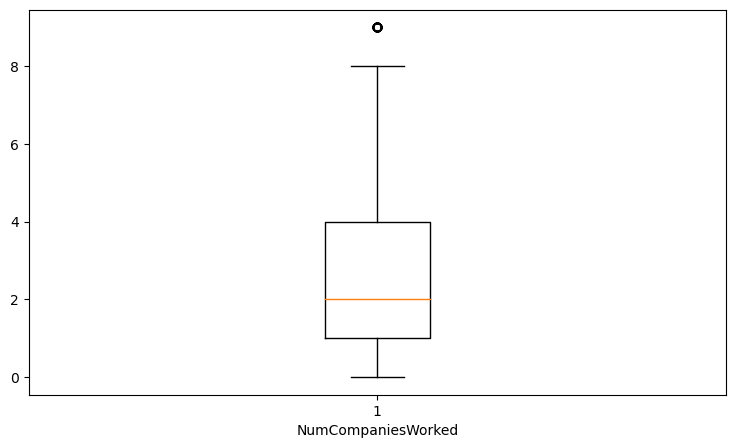

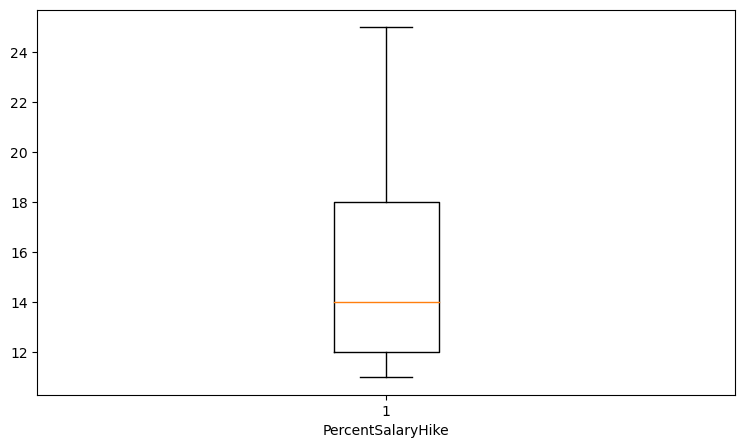

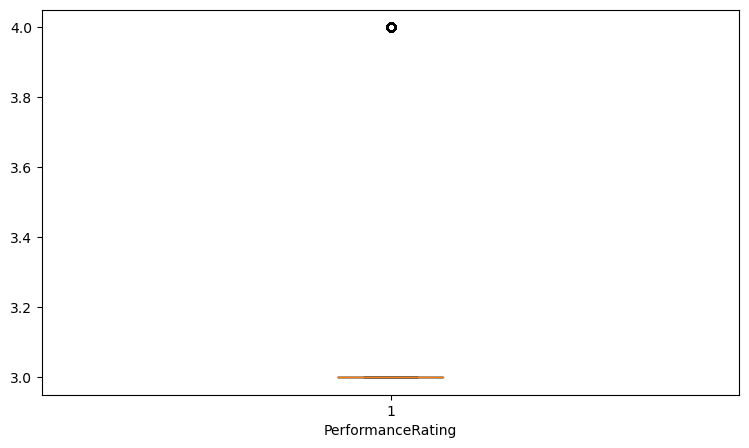

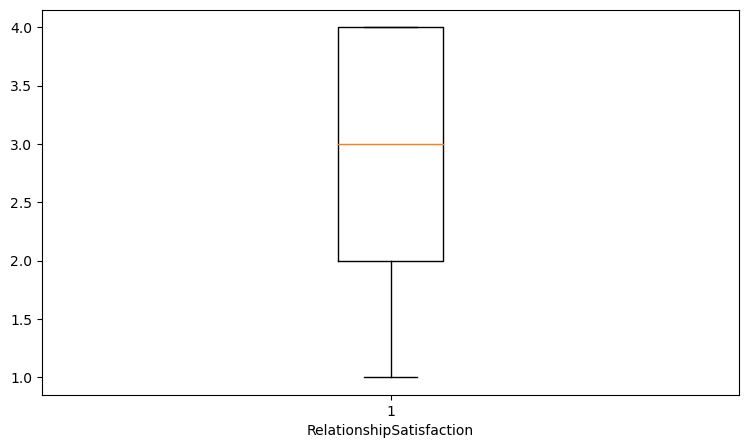

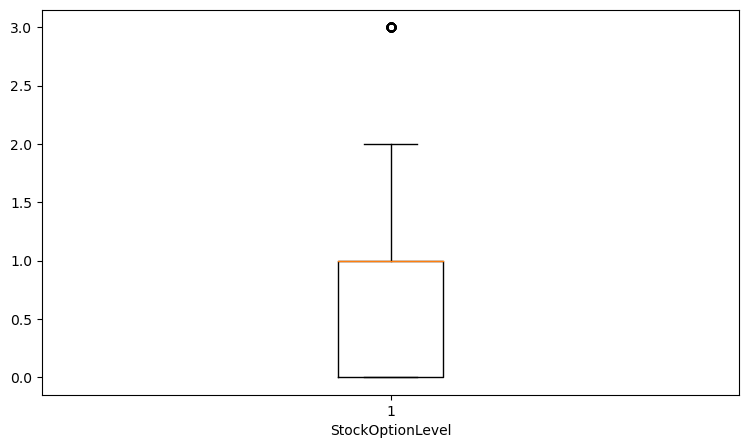

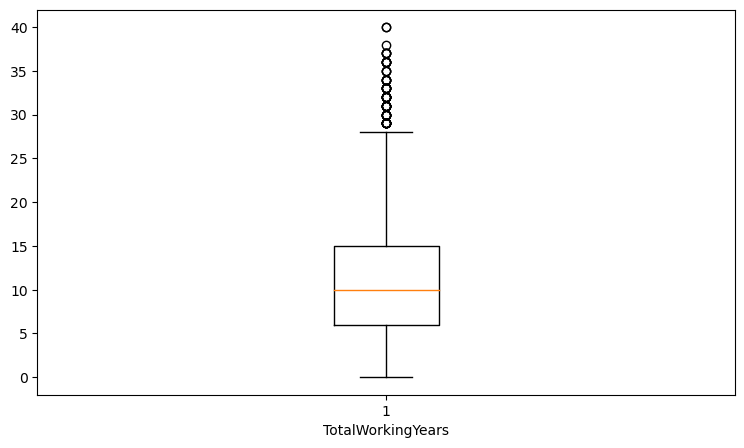

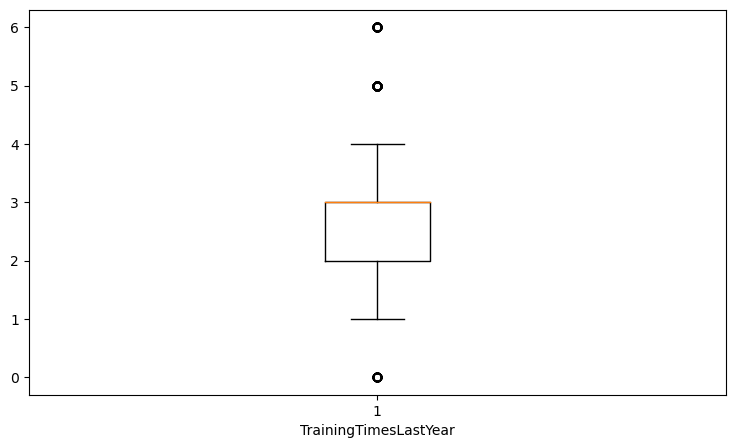

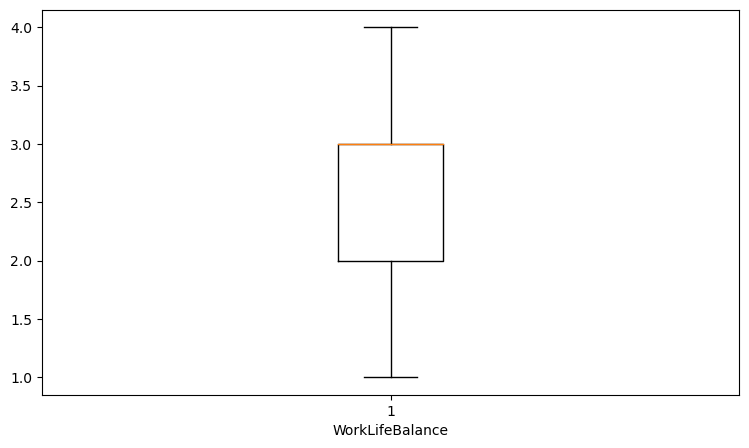

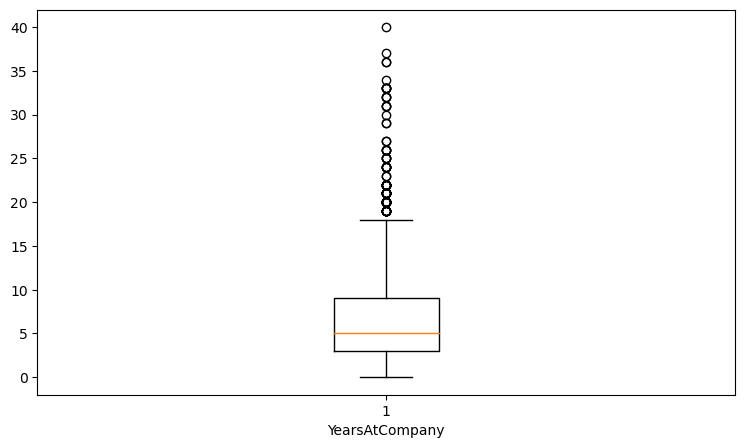

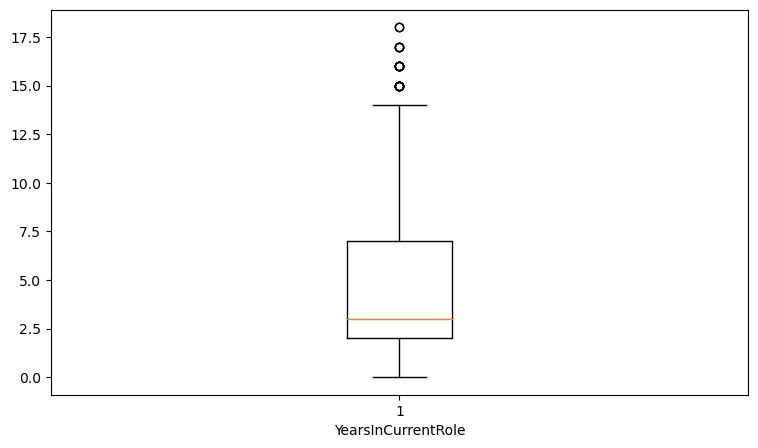

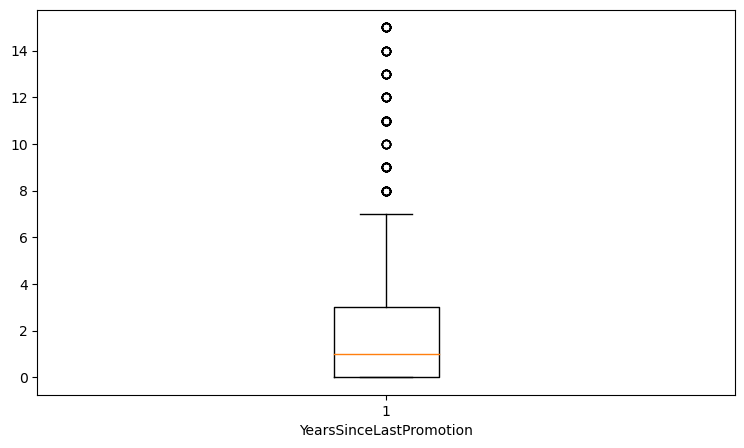

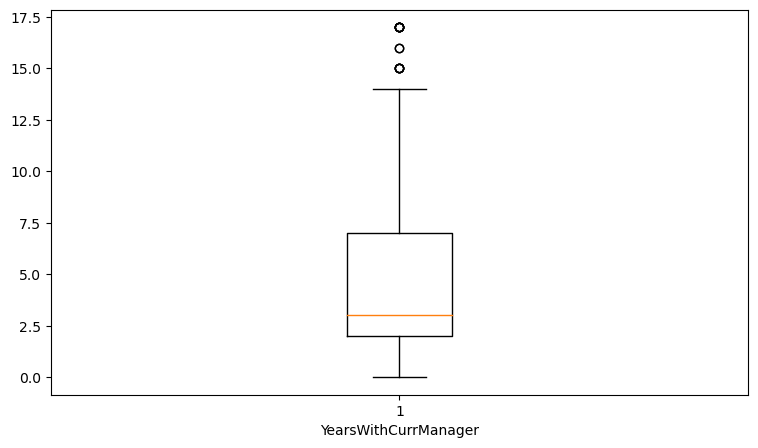

In [25]:
for i in data[cont_data]:
    plt.figure(figsize=(9,5))
    plt.boxplot(x=data[cont_data][i])
    plt.xlabel(i)
    plt.show()

MonthlyIncome,TotalWorkingYears,yearsatcompany have outliers present

# DEALING WITH OUTLIERS

In [26]:
z = zscore(data[cont_data])

In [27]:
data = data[(z<3).all(axis=1)]

In [28]:
data.shape

(1387, 32)

In [29]:
data_loss = (1470-1387)/1470

In [30]:
data_loss

0.05646258503401361

In [31]:
data['Attrition'].replace({"Yes":0,"No":1},inplace=True)

In [32]:
le = LabelEncoder()

In [33]:
cat_data

['BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'OverTime']

In [34]:
#data['BusinessTravel'] = le.fit_transform(data['BusinessTravel'])

In [35]:
#data['Department'] = le.fit_transform(data['Department'])

In [36]:
#data['EducationField'] = le.fit_transform(data['EducationField'])

In [37]:
#data['Gender'] = le.fit_transform(data['Gender'])

In [38]:
#data['JobRole'] = le.fit_transform(data['JobRole'])

In [39]:
#data['MaritalStatus'] = le.fit_transform(data['MaritalStatus'])

In [40]:
#data['OverTime'] = le.fit_transform(data['OverTime'])

In [41]:
data.corr()['Attrition'].sort_values()

DistanceFromHome           -0.081788
NumCompaniesWorked         -0.050314
MonthlyRate                -0.014888
PerformanceRating          -0.010781
HourlyRate                  0.001532
PercentSalaryHike           0.006267
EmployeeNumber              0.010169
YearsSinceLastPromotion     0.029263
Education                   0.032703
RelationshipSatisfaction    0.052344
DailyRate                   0.057220
TrainingTimesLastYear       0.057285
WorkLifeBalance             0.062492
EnvironmentSatisfaction     0.112393
JobSatisfaction             0.114206
JobInvolvement              0.133957
StockOptionLevel            0.136676
Age                         0.159366
MonthlyIncome               0.161848
YearsWithCurrManager        0.162297
YearsAtCompany              0.166455
YearsInCurrentRole          0.171015
JobLevel                    0.171968
TotalWorkingYears           0.185619
Attrition                   1.000000
Name: Attrition, dtype: float64

PerformanceRating,BusinessTravel,HoulryRate have very lerr realtion with label so we can drop them

In [42]:
data.drop(['PerformanceRating','BusinessTravel','HourlyRate'],axis=1,inplace=True)

In [43]:
cat_data.remove('BusinessTravel')

# FEATURE SELECTION

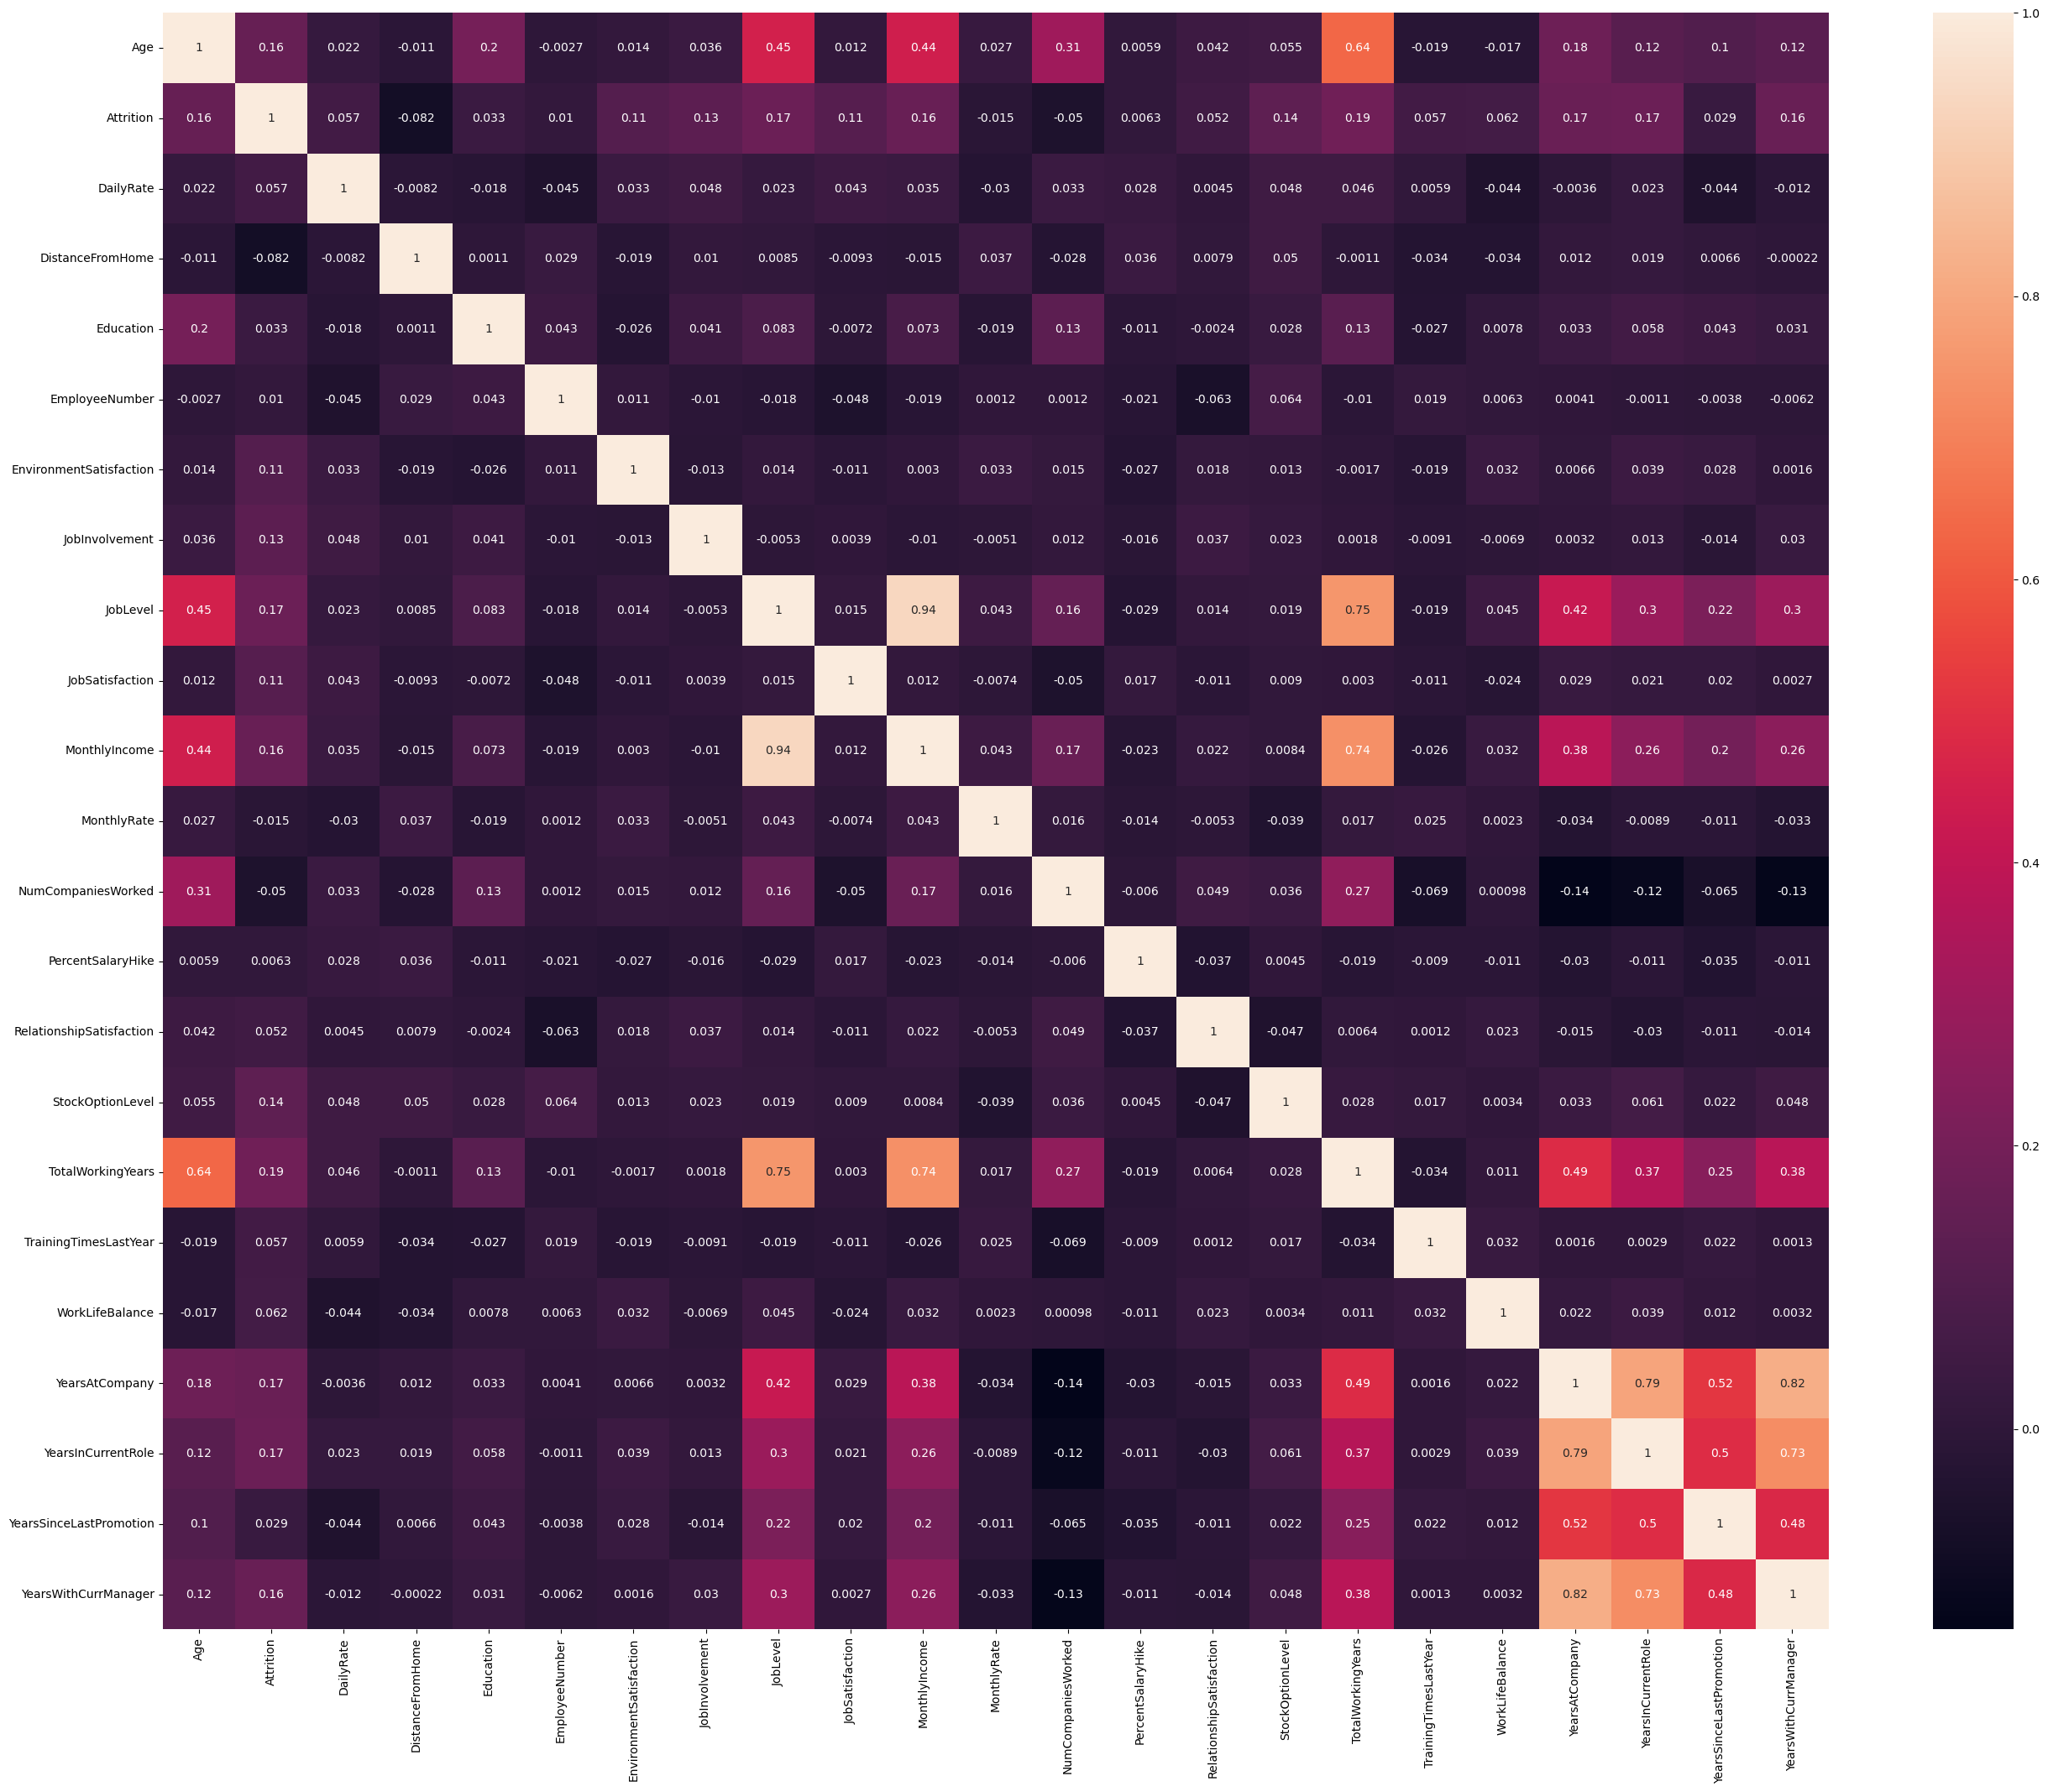

In [44]:
plt.figure(figsize=(32,25))

sns.heatmap(data.corr(),annot=True)

plt.show()

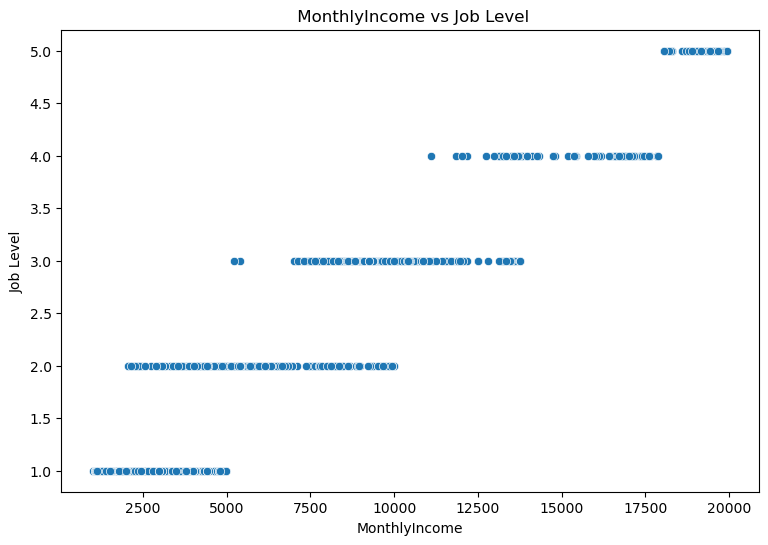

In [45]:
plt.figure(figsize=(9,6))

sns.scatterplot(x = data['MonthlyIncome'],y=data['JobLevel'])

plt.title(' MonthlyIncome vs Job Level')

plt.xlabel('MonthlyIncome')

plt.ylabel('Job Level')

plt.show()

as job level increases the monthly income keeps on increasing and both are showing positive linear relationship so we can drop 1 as both of them are highly co-related

In [46]:
data.drop('MonthlyIncome',axis=1,inplace=True)

In [47]:
data.head()

,Age,Attrition,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,0,1102,Sales,1,2,Life Sciences,1,2,Female,...,11,1,0,8,0,1,6,4,0,5
1,49,1,279,Research & Development,8,1,Life Sciences,2,3,Male,...,23,4,1,10,3,3,10,7,1,7
2,37,0,1373,Research & Development,2,2,Other,4,4,Male,...,15,2,0,7,3,3,0,0,0,0
3,33,1,1392,Research & Development,3,4,Life Sciences,5,4,Female,...,11,3,0,8,3,3,8,7,3,0
4,27,1,591,Research & Development,2,1,Medical,7,1,Male,...,12,4,1,6,3,3,2,2,2,2


In [48]:
X = data.drop(cat_data,axis=1)

y = data['Attrition']

In [49]:
X.drop('Attrition',axis=1,inplace=True)

In [50]:
X

,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyRate,...,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,1,2,3,2,4,19479,...,11,1,0,8,0,1,6,4,0,5
1,49,279,8,1,2,3,2,2,2,24907,...,23,4,1,10,3,3,10,7,1,7
2,37,1373,2,2,4,4,2,1,3,2396,...,15,2,0,7,3,3,0,0,0,0
3,33,1392,3,4,5,4,3,1,3,23159,...,11,3,0,8,3,3,8,7,3,0
4,27,591,2,1,7,1,3,1,2,16632,...,12,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,2061,3,4,2,4,12290,...,17,3,1,17,3,3,5,2,0,3
1466,39,613,6,1,2062,4,2,3,1,21457,...,15,1,1,9,5,3,7,7,1,7
1467,27,155,4,3,2064,2,4,2,2,5174,...,20,2,1,6,0,3,6,2,0,3
1468,49,1023,2,3,2065,4,2,2,2,13243,...,14,4,0,17,3,2,9,6,0,8


In [51]:
cat_data

['Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'OverTime']

we have 27 numerical columns and 6 categorical columns

we will select 20 best features whcih include 6 cat features and 14 numerical features

In [52]:
mi = mutual_info_classif(X,y)

In [53]:
mi = pd.Series(mi)

mi.index = X.columns

mi.sort_values(ascending=False)

StockOptionLevel            0.029556
Age                         0.028804
JobLevel                    0.025743
PercentSalaryHike           0.021524
YearsInCurrentRole          0.015069
TotalWorkingYears           0.014754
YearsSinceLastPromotion     0.011038
TrainingTimesLastYear       0.009610
YearsAtCompany              0.007046
YearsWithCurrManager        0.006617
EnvironmentSatisfaction     0.006582
DailyRate                   0.006229
Education                   0.005757
JobSatisfaction             0.004769
JobInvolvement              0.004509
RelationshipSatisfaction    0.001723
EmployeeNumber              0.000431
MonthlyRate                 0.000000
WorkLifeBalance             0.000000
DistanceFromHome            0.000000
NumCompaniesWorked          0.000000
dtype: float64

In [54]:
bestf = SelectKBest(mutual_info_classif,k=14)

bestf.fit(X,y)

a = X.columns[bestf.get_support()]

In [55]:
a

Index(['Age', 'DistanceFromHome', 'JobLevel', 'MonthlyRate',
       'NumCompaniesWorked', 'PercentSalaryHike', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [56]:
A = list(a)

In [57]:
A

['Age',
 'DistanceFromHome',
 'JobLevel',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'RelationshipSatisfaction',
 'StockOptionLevel',
 'TotalWorkingYears',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [58]:
a = A+cat_data

In [59]:
a

['Age',
 'DistanceFromHome',
 'JobLevel',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'RelationshipSatisfaction',
 'StockOptionLevel',
 'TotalWorkingYears',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'OverTime']

In [60]:
x = data[a]

In [61]:
x.shape

(1387, 20)

In [62]:
x.head()

,Age,DistanceFromHome,JobLevel,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
0,41,1,2,19479,8,11,1,0,8,1,6,4,0,5,Sales,Life Sciences,Female,Sales Executive,Single,Yes
1,49,8,2,24907,1,23,4,1,10,3,10,7,1,7,Research & Development,Life Sciences,Male,Research Scientist,Married,No
2,37,2,1,2396,6,15,2,0,7,3,0,0,0,0,Research & Development,Other,Male,Laboratory Technician,Single,Yes
3,33,3,1,23159,1,11,3,0,8,3,8,7,3,0,Research & Development,Life Sciences,Female,Research Scientist,Married,Yes
4,27,2,1,16632,9,12,4,1,6,3,2,2,2,2,Research & Development,Medical,Male,Laboratory Technician,Married,No


In [63]:
ss = StandardScaler()

In [64]:
x[A] = ss.fit_transform(x[A])

In [65]:
x.head()

,Age,DistanceFromHome,JobLevel,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
0,0.536681,-1.011249,0.043309,0.734688,2.125951,-1.161414,-1.575817,-0.929427,-0.343728,-2.501172,-0.022350,0.040903,-0.710699,0.368270,Sales,Life Sciences,Female,Sales Executive,Single,Yes
1,1.442111,-0.145521,0.043309,1.505353,-0.672430,2.146916,1.199034,0.238250,-0.045106,0.336558,0.832812,0.965895,-0.310480,0.982200,Research & Development,Life Sciences,Male,Research Scientist,Married,No
2,0.083966,-0.887573,-0.941432,-1.690747,1.326414,-0.058637,-0.650866,-0.929427,-0.493039,0.336558,-1.305094,-1.192419,-0.710699,-1.166556,Research & Development,Other,Male,Laboratory Technician,Single,Yes
3,-0.368749,-0.763898,-0.941432,1.257173,-0.672430,-1.161414,0.274084,-0.929427,-0.343728,0.336558,0.405231,0.965895,0.489958,-1.166556,Research & Development,Life Sciences,Female,Research Scientist,Married,Yes
4,-1.047821,-0.887573,-0.941432,0.330473,2.525720,-0.885720,1.199034,0.238250,-0.642351,0.336558,-0.877513,-0.575758,0.089739,-0.552626,Research & Development,Medical,Male,Laboratory Technician,Married,No


In [66]:
ss = pd.get_dummies(x[cat_data])

In [67]:
ss.head()

,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,0,0,1,0,1,0,0,0,0,1,...,0,0,0,1,0,0,0,1,0,1
1,0,1,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,1,0,1,0
2,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1
3,0,1,0,0,1,0,0,0,0,1,...,0,0,1,0,0,0,1,0,0,1
4,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0


In [68]:
x = pd.concat([x,ss],axis=1)

In [69]:
x.head()

,Age,DistanceFromHome,JobLevel,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,WorkLifeBalance,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,0.536681,-1.011249,0.043309,0.734688,2.125951,-1.161414,-1.575817,-0.929427,-0.343728,-2.501172,...,0,0,0,1,0,0,0,1,0,1
1,1.442111,-0.145521,0.043309,1.505353,-0.672430,2.146916,1.199034,0.238250,-0.045106,0.336558,...,0,0,1,0,0,0,1,0,1,0
2,0.083966,-0.887573,-0.941432,-1.690747,1.326414,-0.058637,-0.650866,-0.929427,-0.493039,0.336558,...,0,0,0,0,0,0,0,1,0,1
3,-0.368749,-0.763898,-0.941432,1.257173,-0.672430,-1.161414,0.274084,-0.929427,-0.343728,0.336558,...,0,0,1,0,0,0,1,0,0,1
4,-1.047821,-0.887573,-0.941432,0.330473,2.525720,-0.885720,1.199034,0.238250,-0.642351,0.336558,...,0,0,0,0,0,0,1,0,1,0


In [70]:
x.drop(cat_data,axis=1,inplace=True)

In [71]:
x.head()

,Age,DistanceFromHome,JobLevel,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,WorkLifeBalance,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,0.536681,-1.011249,0.043309,0.734688,2.125951,-1.161414,-1.575817,-0.929427,-0.343728,-2.501172,...,0,0,0,1,0,0,0,1,0,1
1,1.442111,-0.145521,0.043309,1.505353,-0.672430,2.146916,1.199034,0.238250,-0.045106,0.336558,...,0,0,1,0,0,0,1,0,1,0
2,0.083966,-0.887573,-0.941432,-1.690747,1.326414,-0.058637,-0.650866,-0.929427,-0.493039,0.336558,...,0,0,0,0,0,0,0,1,0,1
3,-0.368749,-0.763898,-0.941432,1.257173,-0.672430,-1.161414,0.274084,-0.929427,-0.343728,0.336558,...,0,0,1,0,0,0,1,0,0,1
4,-1.047821,-0.887573,-0.941432,0.330473,2.525720,-0.885720,1.199034,0.238250,-0.642351,0.336558,...,0,0,0,0,0,0,1,0,1,0


In [72]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=90)

# Balancing Dataset

In [73]:
from imblearn.over_sampling import SMOTE

In [74]:
sm = SMOTE(sampling_strategy=1)

In [75]:
x_trains,y_trains = sm.fit_resample(x_train,y_train)

In [76]:
y_trains.value_counts()

0    926
1    926
Name: Attrition, dtype: int64

In [77]:
y_train.value_counts()

1    926
0    183
Name: Attrition, dtype: int64

# LR

In [78]:
lr = LogisticRegression()

In [79]:
lr.fit(x_trains,y_trains)

LogisticRegression()

In [80]:
pred1 = lr.predict(x_trains)

In [81]:
pred2 = lr.predict(x_test)

In [82]:
print(f'Training Score:{accuracy_score(y_trains,pred1)}')

Training Score:0.9071274298056156


In [83]:
print(f'Test Score:{accuracy_score(y_test,pred2)}')

Test Score:0.8848920863309353


In [84]:
a1 = accuracy_score(y_trains,pred1)

In [85]:
a2 = accuracy_score(y_test,pred2)

In [86]:
print(classification_report(y_test,pred2))

              precision    recall  f1-score   support

           0       0.71      0.52      0.60        46
           1       0.91      0.96      0.93       232

    accuracy                           0.88       278
   macro avg       0.81      0.74      0.77       278
weighted avg       0.88      0.88      0.88       278



In [87]:
print(confusion_matrix(y_test,pred2))

[[ 24  22]
 [ 10 222]]


In [88]:
cv = cross_val_score(lr,x,y)

a3 = cv.mean()

a3

0.8658883723346232

In [89]:
roc_auc_score(y_test,pred2)

0.7393178410794603

# KNN

In [90]:
knn = KNeighborsClassifier()

In [91]:
knn.fit(x_trains,y_trains)

KNeighborsClassifier()

In [92]:
pred3 = knn.predict(x_trains)

In [93]:
pred4 = knn.predict(x_test)

In [94]:
print(f'Training Score:{accuracy_score(y_trains,pred3)}')

Training Score:0.8882289416846653


In [95]:
print(f'Test Score:{accuracy_score(y_test,pred4)}')

Test Score:0.7266187050359713


In [96]:
a4 = accuracy_score(y_trains,pred3)

In [97]:
a5 = accuracy_score(y_test,pred4)

In [98]:
print(classification_report(y_test,pred4))

              precision    recall  f1-score   support

           0       0.31      0.52      0.39        46
           1       0.89      0.77      0.82       232

    accuracy                           0.73       278
   macro avg       0.60      0.64      0.61       278
weighted avg       0.79      0.73      0.75       278



In [99]:
print(confusion_matrix(y_test,pred4))

[[ 24  22]
 [ 54 178]]


In [100]:
roc_auc_score(y_test,pred4)

0.6444902548725637

In [101]:
cv = cross_val_score(knn,x,y)

a6 = cv.mean()

a6

0.8298496221073682

# DT

In [102]:
dt = DecisionTreeClassifier()

In [103]:
dt.fit(x_trains,y_trains)

DecisionTreeClassifier()

In [104]:
pred5 = dt.predict(x_trains)

In [105]:
pred6 = dt.predict(x_test)

In [106]:
a7 = accuracy_score(y_trains,pred5)

In [107]:
a8 = accuracy_score(y_test,pred6)

In [108]:
print(f'Training Score:{accuracy_score(y_trains,pred5)}')

Training Score:1.0


In [109]:
print(f'Test Score:{accuracy_score(y_test,pred6)}')

Test Score:0.7589928057553957


In [110]:
print(classification_report(y_test,pred6))

              precision    recall  f1-score   support

           0       0.32      0.39      0.35        46
           1       0.87      0.83      0.85       232

    accuracy                           0.76       278
   macro avg       0.59      0.61      0.60       278
weighted avg       0.78      0.76      0.77       278



In [111]:
print(confusion_matrix(y_test,pred6))

[[ 18  28]
 [ 39 193]]


In [112]:
roc_auc_score(y_test,pred6)

0.6116004497751124

In [113]:
cv = cross_val_score(dt,x,y)

a9 = cv.mean()

a9

0.7844038126899203

# RANDOM FOREST

In [114]:
rf = RandomForestClassifier()

In [115]:
rf.fit(x_trains,y_trains)

RandomForestClassifier()

In [116]:
pred7 = rf.predict(x_trains)

In [117]:
pred8 = rf.predict(x_test)

In [118]:
a10 = accuracy_score(y_trains,pred7)

In [119]:
a11 = accuracy_score(y_test,pred8)

In [120]:
print(f'Training Score:{accuracy_score(y_trains,pred7)}')

Training Score:1.0


In [121]:
print(f'Test Score:{accuracy_score(y_test,pred8)}')

Test Score:0.8848920863309353


In [122]:
print(classification_report(y_test,pred8))

              precision    recall  f1-score   support

           0       0.73      0.48      0.58        46
           1       0.90      0.97      0.93       232

    accuracy                           0.88       278
   macro avg       0.82      0.72      0.76       278
weighted avg       0.88      0.88      0.87       278



In [123]:
print(confusion_matrix(y_test,pred8))

[[ 22  24]
 [  8 224]]


In [124]:
roc_auc_score(y_test,pred8)

0.7218890554722639

In [125]:
cv = cross_val_score(rf,x,y)

a12 = cv.mean()

a12

0.8457107238397008

# ADA

In [126]:
ada = AdaBoostClassifier()

In [127]:
ada.fit(x_trains,y_trains)

AdaBoostClassifier()

In [128]:
pred9 = ada.predict(x_trains)

In [129]:
pred10 = ada.predict(x_test)

In [130]:
print(f'Training Score:{accuracy_score(y_trains,pred9)}')

Training Score:0.9011879049676026


In [131]:
print(f'Test Score:{accuracy_score(y_test,pred10)}')

Test Score:0.8884892086330936


In [132]:
a13 = accuracy_score(y_trains,pred9)

In [133]:
a14 = accuracy_score(y_test,pred10)

In [134]:
print(classification_report(y_test,pred10))

              precision    recall  f1-score   support

           0       0.65      0.70      0.67        46
           1       0.94      0.93      0.93       232

    accuracy                           0.89       278
   macro avg       0.80      0.81      0.80       278
weighted avg       0.89      0.89      0.89       278



In [135]:
print(confusion_matrix(y_test,pred10))

[[ 32  14]
 [ 17 215]]


In [136]:
roc_auc_score(y_test,pred10)

0.8111881559220389

In [137]:
cv = cross_val_score(ada,x,y)

a15 = cv.mean()

a15

0.8536477677064125

# GBDT

In [138]:
gb = GradientBoostingClassifier()

In [139]:
gb.fit(x_trains,y_trains)

GradientBoostingClassifier()

In [140]:
pred11 = gb.predict(x_trains)

In [141]:
pred12 = gb.predict(x_test)

In [142]:
print(f'Training Score:{accuracy_score(y_trains,pred11)}')

Training Score:0.9487041036717062


In [143]:
print(f'Test Score:{accuracy_score(y_test,pred12)}')

Test Score:0.8884892086330936


In [144]:
a16 = accuracy_score(y_trains,pred11)

In [145]:
a17 = accuracy_score(y_test,pred12)

In [146]:
print(classification_report(y_test,pred12))

              precision    recall  f1-score   support

           0       0.74      0.50      0.60        46
           1       0.91      0.97      0.94       232

    accuracy                           0.89       278
   macro avg       0.82      0.73      0.77       278
weighted avg       0.88      0.89      0.88       278



In [147]:
print(confusion_matrix(y_test,pred12))

[[ 23  23]
 [  8 224]]


In [148]:
roc_auc_score(y_test,pred12)

0.7327586206896552

In [149]:
cv = cross_val_score(gb,x,y)

a18 = cv.mean()

a18

0.8601277822507338

# SVM

In [150]:
svm = SVC()

In [151]:
svm.fit(x_trains,y_trains)

SVC()

In [152]:
pred13 = svm.predict(x_trains)

In [153]:
pred14 = svm.predict(x_test)

In [154]:
print(f'Training Score:{accuracy_score(y_trains,pred13)}')

Training Score:0.9514038876889849


In [155]:
print(f'Test Score:{accuracy_score(y_test,pred14)}')

Test Score:0.8705035971223022


In [156]:
a19 = accuracy_score(y_trains,pred13)

In [157]:
a20 = accuracy_score(y_test,pred14)

In [158]:
print(classification_report(y_test,pred14))

              precision    recall  f1-score   support

           0       0.68      0.41      0.51        46
           1       0.89      0.96      0.93       232

    accuracy                           0.87       278
   macro avg       0.79      0.69      0.72       278
weighted avg       0.86      0.87      0.86       278



In [159]:
print(confusion_matrix(y_test,pred14))

[[ 19  27]
 [  9 223]]


In [160]:
roc_auc_score(y_test,pred14)

0.6871251874062969

In [161]:
cv = cross_val_score(svm,x,y)

a21 = cv.mean()

a21

0.8485936160818637

In [162]:
train = []
test = []
cv = []

In [163]:
model = ['LR','KNN','DT','RF','ADA','GBDT','SVM']

In [164]:
train.append(a1)
test.append(a2)
cv.append(a3)

train.append(a4)
test.append(a5)
cv.append(a6)

train.append(a7)
test.append(a8)
cv.append(a9)

train.append(a10)
test.append(a11)
cv.append(a12)

train.append(a13)
test.append(a14)
cv.append(a15)

train.append(a16)
test.append(a17)
cv.append(a18)

train.append(a19)
test.append(a20)
cv.append(a21)




In [165]:
result = pd.DataFrame({'Models':model,'TRAINIGN RESULT':train,'TEST RESULT':test,"CV SCORE":cv})

In [166]:
result

,Models,TRAINIGN RESULT,TEST RESULT,CV SCORE
0,LR,0.907127,0.884892,0.865888
1,KNN,0.888229,0.726619,0.829850
2,DT,1.000000,0.758993,0.784404
3,RF,1.000000,0.884892,0.845711
4,ADA,0.901188,0.888489,0.853648
5,GBDT,0.948704,0.888489,0.860128
6,SVM,0.951404,0.870504,0.848594


we want model with high precision for Attrition rate so we choose GBDT Model

In [167]:
print(confusion_matrix(y_test,pred12))

[[ 23  23]
 [  8 224]]


In [168]:
precision_score(y_test,pred12)

0.9068825910931174

In [169]:
fpr,tpr,threshold = roc_curve(y_test,pred12)

In [170]:
roc_auc_score(y_test,pred12)

0.7327586206896552

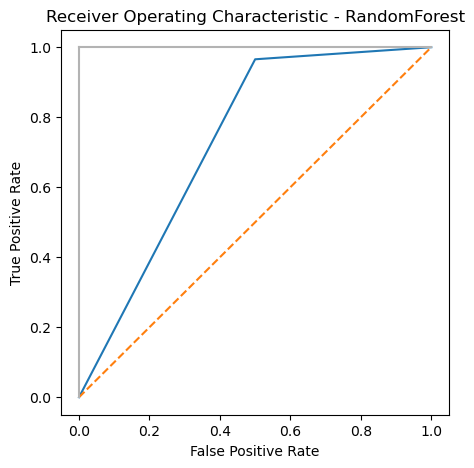

In [171]:
plt.subplots(1, figsize=(5,5))
plt.title('Receiver Operating Characteristic - RandomForest')
plt.plot(fpr,tpr)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# HYPER PARAMETER TUNING

In [172]:
gb = GradientBoostingClassifier()

In [183]:
para = {"n_estimators":[5,50,250,500],
    "max_depth":[1,3,5,7,9],
    "learning_rate":[0.01,0.1,1,10,100],
       'loss':['log_loss', 'deviance', 'exponential'],
       'criterion':['friedman_mse', 'squared_error'],
       'max_features':['auto', 'sqrt', 'log2']}

In [184]:
gs = GridSearchCV(gb,para,n_jobs=-1)

In [185]:
gs.fit(x_trains,y_trains)

GridSearchCV(estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'criterion': ['friedman_mse', 'squared_error'],
                         'learning_rate': [0.01, 0.1, 1, 10, 100],
                         'loss': ['log_loss', 'deviance', 'exponential'],
                         'max_depth': [1, 3, 5, 7, 9],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [5, 50, 250, 500]})

In [186]:
gs.best_params_

{'criterion': 'squared_error',
 'learning_rate': 0.1,
 'loss': 'log_loss',
 'max_depth': 9,
 'max_features': 'log2',
 'n_estimators': 500}

In [187]:
gs.best_estimator_.fit(x_trains,y_trains)

GradientBoostingClassifier(criterion='squared_error', max_depth=9,
                           max_features='log2', n_estimators=500)

In [188]:
trainpred = gs.best_estimator_.predict(x_trains)

In [189]:
testpred = gs.best_estimator_.predict(x_test)

In [190]:
print(f'Training Score:{accuracy_score(y_trains,trainpred)}')

Training Score:1.0


In [191]:
print(f'Test Score:{accuracy_score(y_test,testpred)}')

Test Score:0.8848920863309353


In [193]:
conclusion = pd.DataFrame({"ACTUAL VALUES":y_test,'PREDICTED':testpred})

In [194]:
conclusion

,ACTUAL VALUES,PREDICTED
361,1,1
502,1,1
1145,1,1
1260,1,1
778,1,1
...,...,...
8,1,1
1094,1,1
393,1,1
272,1,1


In [196]:
print(classification_report(y_test,testpred))

              precision    recall  f1-score   support

           0       0.79      0.41      0.54        46
           1       0.89      0.98      0.93       232

    accuracy                           0.88       278
   macro avg       0.84      0.70      0.74       278
weighted avg       0.88      0.88      0.87       278



In [197]:
print(confusion_matrix(y_test,testpred))

[[ 19  27]
 [  5 227]]


In [198]:
fpr,tpr,threshold = roc_curve(y_test,testpred)

In [199]:
roc_auc_score(y_test,testpred)

0.6957458770614693

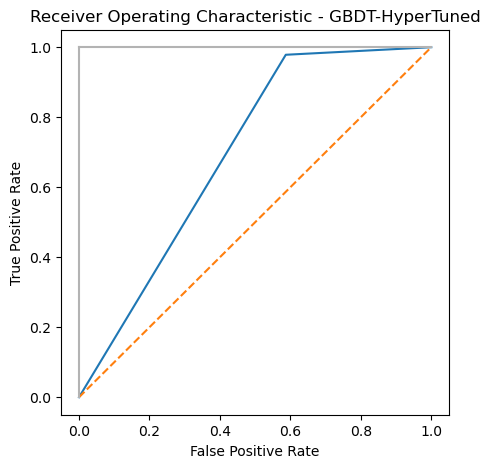

In [200]:
plt.subplots(1, figsize=(5,5))
plt.title('Receiver Operating Characteristic - GBDT-HyperTuned')
plt.plot(fpr,tpr)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [201]:
pickle.dump(gs.best_estimator_,open('hr_attrition.pkl','wb'))